# I started a new Notebook for CA3. I have submitted the notebook from last year too

In [1]:
#pip install summarytools

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn import metrics
import summarytools as st
from datetime import datetime

In [3]:
#I want to be able to view all columns at once so I use the set option fucntion in pandas library.
pd.set_option("display.max_columns", None)
pd.options.mode.chained_assignment = None

In [4]:
#storing dataset to variable
Prem_df = pd.read_csv("matches-1.csv")
Prem2024_2025 = pd.read_csv("Update 13:02:2025.csv")


# ======================================================

# Tidying up to date Data from This Season 2024/2025

In [5]:
#Fixing this years prem data
drop2024 = ["Unnamed: 12","Unnamed: 13","Unnamed: 14","Unnamed: 15","Unnamed: 16"]
Prem2024_2025.drop(drop2024, axis = 1, inplace = True)


In [6]:
StartIndex = 200
EndIndex=210
Prem2024_2025.drop(Prem2024_2025.index[StartIndex:EndIndex], inplace = True)
Prem2024_2025.tail()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,team
466,04/01/2024,Home,L,0,3,Nottingham Forest,1.57,2.20,61,13,6.0,Wolverhampton Wanderers
467,15/01/2025,Away,L,0,3,Newcastle United,1.45,1.93,39,13,7.0,Wolverhampton Wanderers
468,18/01/2025,Away,L,1,3,Chelsea,0.86,3.15,37,9,4.0,Wolverhampton Wanderers
469,25/01/2025,Home,L,0,1,Arsenal,0.58,0.99,52,9,4.0,Wolverhampton Wanderers
470,01/02/2025,Home,W,2,0,Aston Villa,1.57,0.51,31,8,5.0,Wolverhampton Wanderers


In [7]:
STH = "Southampton"
BHOVE = 'Brighton and Hove Albion'
ARS = "Arsenal"

Prem2024_2025["opponent"].replace({'Bnrighton and Hove Albion':BHOVE, "Southamton":STH,
                                  'Aresenal': ARS},inplace = True)

Prem2024_2025["team"].replace({'Bnrighton and Hove Albion':BHOVE,
                                  'Aresenal': ARS},inplace = True)

In [8]:
Prem2024_2025.info()

<class 'pandas.core.frame.DataFrame'>
Index: 461 entries, 0 to 470
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      461 non-null    object 
 1   venue     461 non-null    object 
 2   result    461 non-null    object 
 3   gf        461 non-null    int64  
 4   ga        461 non-null    int64  
 5   opponent  461 non-null    object 
 6   xg        461 non-null    float64
 7   xga       461 non-null    float64
 8   poss      461 non-null    int64  
 9   sh        461 non-null    int64  
 10  sot       459 non-null    float64
 11  team      461 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 46.8+ KB


# ======================================================

In [9]:
#sorting the order of the seasons into correct order
#Prem_df["season"] = Prem_df["season"].sort_values().reset_index(drop=True)

In [10]:
Prem_df["comp"].unique()

array(['Premier League'], dtype=object)

In [11]:
Prem_df.shape

(4788, 28)

In [12]:
Prem_df.describe()

,Unnamed: 0,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,3155.000000,0.0,4788.000000,4788.000000,4786.000000,4788.000000,4788.000000,4788.00000,4788.000000
mean,63.044069,1.447995,1.405388,1.396512,1.364745,50.432957,38397.586688,NaN,12.619256,4.261278,17.356247,0.453216,0.118212,0.14599,2022.365079
std,42.865191,1.312635,1.286927,0.828847,0.814947,12.810958,17595.849137,NaN,5.548444,2.459963,3.049341,0.665250,0.342362,0.37937,1.461850
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,5.300000,0.000000,0.000000,0.00000,2020.000000
25%,28.000000,0.000000,0.000000,0.800000,0.700000,41.000000,25513.500000,NaN,9.000000,2.000000,15.400000,0.000000,0.000000,0.00000,2021.000000
50%,62.000000,1.000000,1.000000,1.300000,1.200000,51.000000,36347.000000,NaN,12.000000,4.000000,17.200000,0.000000,0.000000,0.00000,2023.000000
75%,87.000000,2.000000,2.000000,1.900000,1.800000,60.000000,53235.500000,NaN,16.000000,6.000000,19.100000,1.000000,0.000000,0.00000,2024.000000
max,182.000000,9.000000,9.000000,7.000000,7.000000,82.000000,75546.000000,NaN,36.000000,15.000000,39.900000,4.000000,3.000000,3.00000,2024.000000


In [13]:
Prem_df.isna().sum()

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance      1633
captain            0
formation          0
referee            0
match report       0
notes           4788
sh                 0
sot                0
dist               2
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [14]:
st.dfSummary(Prem_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Unnamed: 0[int64],Mean (sd) : 63.0 (42.9)min < med < max:0.0 < 62.0 < 182.0IQR (CV) : 59.0 (1.5),182 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACv0lEQVR4nO3dPY7aQBiA4W/CggwothAr6LhApBSUNLlBDps2XZDgAtyABiFZxgiyiB87VTaKRAIee3bnM+9Trw3FK8+O7RlMnucC+O7De38B4B5Pt/7AGNMWkZbl+Y95nr9YHgu8+m+oxph2v9//GoZhz+bk2+02McZ8I1aUdeuK2grDsDeZTF6iKDoUOXGapsFsNuvFcdwSEXWhMpL45ebQLyISRdFhMBj8tDh/2+KYd8dI4p+7Qn1ADzuS+Kq2oZYcusMsy5pRFCWPNJL4rJahlh26T6dTcLlcPh0Ohx8iYhMqKlbLUKXE0C0islwue4vFonM+nxsuvhyKq2uoImI/CUyShKHbMzyZggqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKjhdM3W5XJoiEhpjbE/BjiMQEYeh7vf75ul0+jwajRqNRqPwSlARdhzBH85CPR6PT0EQdMbj8WE4HCZFj0/TNJhOp4M4jp+NMduCh4dZljWLfib85Xy5dLfbtVqyXOaKzAYS9ePtuv4yV2Q2kKgfb0P9zeaKzAYS9cPtKahAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSo4P2TKY1Kvt7Iq41XEGrFyr7eyKuN1xFqxcq8TMOPqf0boTpi+3qj8GNqVzGZggqEChUIFSrwP6pnWLl7HaF6pIqVu5vNZmeM+S4iNsd7GzmheqTsyt3VavVxPp9/GY1Gz3W7h0uoHrK9tZUkSbuu93AJtYbqeA+XWT9U4IqKVz7fcSBUiIj/e4URKkSkmr3CXE7GCBV/KTERE3E4GWMyBRW4oqIyLlc2ECoq4XplA6GiEq5XNhAqKuXqqRiTKahAqFDhrqE/TdOg6Il3u10gIrLf74P1et15y+O1frbW7132+Hv6+gXyOL2wcYRf6AAAAABJRU5ErkJggg=="">",0(0.0%)
2,date[object],1. 2021-05-232. 2020-07-263. 2020-10-044. 2020-12-165. 2021-05-196. 2020-12-267. 2021-01-308. 2020-01-019. 2019-12-2610. 2019-08-3111. other,"40 (0.8%)26 (0.5%)24 (0.5%)24 (0.5%)24 (0.5%)24 (0.5%)24 (0.5%)23 (0.5%)23 (0.5%)21 (0.4%)4,535 (94.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfElEQVR4nO3cwWoaUQCG0WuQ0GxGRPBhfIg8bB/CtxFxFk3Ixi5qd60JNP2k9pxVoZtZfIzTy/27OJ/PAwoPt34A/h9iIyM2MmIjIzYyYiMjNjJiIyM2MosxxtMYY5zP55cbPwt3brnZbJ7HGGOxWHwVHH/TwzRN62ma1mOMx1s/DPfNNxsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkVnO83y8/Pntpk/C3bNBILPwX2ZR8WYjY11FxrqKjKMPMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kXAsnY/BCxpuNjMELGYMXMo4+yIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQcS2cjMELGd9sZPyMkrGuImNdRcY3GxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMq6Fk7GuIuPNRsbghYzBCxlHH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyLgWTsbghYw3GxmDFzIGL2QcfZARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMjYIZKyryHizkbGuImNdRcbRBxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMq6FkzF4IePNRsbghYzBCxlHH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyLgWTsbghYxvNjJ+RslYV5GxriLjm42M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnXwslYV5HxZiNj8ELG4IWMow8yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2RcCydj8ELm55vNlXA+w9u1X8jlZrN5vmwQ4I/M83y8NpxaTtO03u12L6vV6rV+OO7H6XT6st/v14fD4XGM8evYxhhjtVq9brfbb+nTcY+erv2lczYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyyzF+XA+59YPwb/tIQ8t5no/7/X493rkeAu+5jKd+O5xyLZzPdPVauMELGf9AICM2MmIjIzYyYiMjNjJiIyM2MmIj8x0gQBAnkyXa7AAAAABJRU5ErkJggg=="">",0(0.0%)
3,time[object],1. 15:00 (17:00)2. 15:00 (16:00)3. 20:00 (22:00)4. 14:00 (16:00)5. 17:30 (19:30)6. 16:30 (18:30)7. 12:30 (14:30)8. 20:00 (21:00)9. 14:00 (15:00)10. 12:30 (13:30)11. other,"747 (15.6%)457 (9.5%)415 (8.7%)325 (6.8%)293 (6.1%)246 (5.1%)222 (4.6%)219 (4.6%)179 (3.7%)158 (3.3%)1,527 (31.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEO0lEQVR4nO3dTWojVwBG0VIwTXoiYQxejBeRxWYR2o0x1iDd9EQZZNj6K+nVDYXPWUDJg8sTVdRnbY7H4wSFP/7vP4CvQ2xkxEZGbGTERkZsZMRGRmxkxEZmM03T92mavi34Gb+Ox+OPBa/PSjy9vLz8td1un5f6gMPh8LHZbP4WHE/b7fb57e3tx263+zn64p+fn3/u9/vn9/f3b9M0ie2Le5qmadrtdj9fX1//Wegzvi90XVbGDQIZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZF5mqb/3jtb4uJLXZd1ejocDh/7/f55Wui9s8Ph8DFN068lrs262CCQ2fiXWVQePdmcWtzsoXWV5RRz3L2uspxirkfXVZZT3MxDXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyY

### deleting rows with non premier league teams !!!

In [15]:
Prem_df["opponent"].unique()

array(['Wolves', 'Leicester City', 'Leeds United', 'Arsenal', 'West Ham',
       'Sheffield Utd', 'Liverpool', 'Tottenham', 'Burnley', 'Fulham',
       'Manchester Utd', 'West Brom', 'Southampton', 'Newcastle Utd',
       'Chelsea', 'Brighton', 'Crystal Palace', 'Aston Villa', 'Everton',
       'Manchester City', 'Norwich City', 'Bournemouth', 'Watford',
       "Nott'ham Forest", 'Luton Town', 'Brentford'], dtype=object)

In [16]:
Prem_df["team"].unique()

array(['Manchester City', 'Manchester United', 'Liverpool', 'Chelsea',
       'Leicester City', 'West Ham United', 'Tottenham Hotspur',
       'Arsenal', 'Leeds United', 'Everton', 'Aston Villa',
       'Newcastle United', 'Wolverhampton Wanderers', 'Crystal Palace',
       'Southampton', 'Brighton and Hove Albion', 'Burnley', 'Fulham',
       'West Bromwich Albion', 'Sheffield United', 'Bournemouth',
       'Brentford', 'Nottingham Forest', 'Luton Town', 'Watford',
       'Norwich City'], dtype=object)

In [17]:
Prem_df.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

In [18]:
PREM_df_Full=Prem_df[['date',  'round', 'venue', 'team','opponent','result',
             'formation','gf', 'ga', 'xg', 'xga', 'poss',
             'referee', 'sh', 'sot', 'dist',
               'fk', 'pk', 'pkatt']]

In [19]:
Prem_df.shape

(4788, 28)

In [20]:
Prem_df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,Wolves,1.9,0.6,65,NaN,Fernandinho,4-2-3-1,Andre Marriner,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,2.9,72,NaN,Fernandinho,4-2-3-1,Michael Oliver,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,Leeds United,1.2,2.4,49,NaN,Kevin De Bruyne,4-3-3,Mike Dean,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,0.9,58,NaN,Raheem Sterling,3-1-4-2,Chris Kavanagh,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,0.3,69,NaN,Raheem Sterling,4-3-3,Anthony Taylor,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,87,2020-07-07,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,Watford,1.2,1.2,56,NaN,Alexander Tettey,4-2-3-1,Anthony Taylor,Match Report,NaN,12,3,16.9,1,0,0,2020,Norwich City
4784,88,2020-07-11,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,West Ham,0.6,3.5,53,NaN,Alexander Tettey,4-2-3-1,Kevin Friend,Match Report,NaN,11,2,19.8,1,0,0,2020,Norwich City
4785,89,2020-07-14,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,Chelsea,0.1,2.5,33,NaN,Alexander Tettey,4-1-4-1,Jonathan Moss,Match Report,NaN,2,0,20.6,0,0,0,2020,Norwich City
4786,90,2020-07-18,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,Burnley,0.3,1.8,42,NaN,Alexander Tettey,4-2-3-1,Kevin Friend,Match Report,NaN,6,2,13.4,0,0,0,2020,Norwich City


In [21]:
#Prem_df["date"] = pd.to_datetime(Prem_df["date"], format='%Y-%m-%d', errors='coerce')

In [22]:
Prem_df['time'] = Prem_df["time"].str.split().str[0]
#Prem_df['time'] = pd.to_datetime(Prem_df["time"].str.split().str[0], format='%H:%M').dt.time

In [23]:
Prem_df['day'].unique()

array(['Mon', 'Sun', 'Sat', 'Tue', 'Wed', 'Fri', 'Thu'], dtype=object)

In [24]:
Prem_df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15,Premier League,Matchweek 2,Mon,Away,W,3,1,Wolves,1.9,0.6,65,NaN,Fernandinho,4-2-3-1,Andre Marriner,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30,Premier League,Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,2.9,72,NaN,Fernandinho,4-2-3-1,Michael Oliver,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30,Premier League,Matchweek 4,Sat,Away,D,1,1,Leeds United,1.2,2.4,49,NaN,Kevin De Bruyne,4-3-3,Mike Dean,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,0.9,58,NaN,Raheem Sterling,3-1-4-2,Chris Kavanagh,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30,Premier League,Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,0.3,69,NaN,Raheem Sterling,4-3-3,Anthony Taylor,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,87,2020-07-07,18:00,Premier League,Matchweek 34,Tue,Away,L,1,2,Watford,1.2,1.2,56,NaN,Alexander Tettey,4-2-3-1,Anthony Taylor,Match Report,NaN,12,3,16.9,1,0,0,2020,Norwich City
4784,88,2020-07-11,12:30,Premier League,Matchweek 35,Sat,Home,L,0,4,West Ham,0.6,3.5,53,NaN,Alexander Tettey,4-2-3-1,Kevin Friend,Match Report,NaN,11,2,19.8,1,0,0,2020,Norwich City
4785,89,2020-07-14,20:15,Premier League,Matchweek 36,Tue,Away,L,0,1,Chelsea,0.1,2.5,33,NaN,Alexander Tettey,4-1-4-1,Jonathan Moss,Match Report,NaN,2,0,20.6,0,0,0,2020,Norwich City
4786,90,2020-07-18,17:30,Premier League,Matchweek 37,Sat,Home,L,0,2,Burnley,0.3,1.8,42,NaN,Alexander Tettey,4-2-3-1,Kevin Friend,Match Report,NaN,6,2,13.4,0,0,0,2020,Norwich City


In [25]:
#Dropping colums that I know have no relevance based off CA2
drop_columns = Prem_df[["fk","season","pkatt","pk","Unnamed: 0","attendance", "notes","captain","formation", "referee", "match report","comp","round"]]
Prem_df.drop(drop_columns, axis=1, inplace=True)

In [26]:
Prem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      4788 non-null   object 
 1   time      4788 non-null   object 
 2   day       4788 non-null   object 
 3   venue     4788 non-null   object 
 4   result    4788 non-null   object 
 5   gf        4788 non-null   int64  
 6   ga        4788 non-null   int64  
 7   opponent  4788 non-null   object 
 8   xg        4788 non-null   float64
 9   xga       4788 non-null   float64
 10  poss      4788 non-null   int64  
 11  sh        4788 non-null   int64  
 12  sot       4788 non-null   int64  
 13  dist      4786 non-null   float64
 14  team      4788 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 561.2+ KB


In [27]:
Prem_df.drop_duplicates(subset = ["date", "team", "opponent", "result"],inplace=True)
Prem_df.reset_index(drop=True, inplace=True)

In [28]:
dropped_teams = Prem_df

In [29]:
#Filling two nan values in distance col with mean
dist_mean=dropped_teams["dist"].mean()
dropped_teams["dist"].fillna(dist_mean, inplace=True)

In [30]:
#tidying up mis spellings

MANU = "Manchester United"
WESTHam = 'West Ham United'
BHOVE = 'Brighton and Hove Albion'
WBROM = 'West Bromwich Albion'
WOLVES = 'Wolverhampton Wanderers'
SPURS = 'Tottenham Hotspur'
NEWC = 'Newcastle United'
NOTSF = 'Nottingham Forest'

dropped_teams["opponent"].replace({'Manchester Utd': MANU,'West Ham':WESTHam, 'Brighton':BHOVE,
                            'West Brom':WBROM, 'Wolves':WOLVES, 'Tottenham':SPURS,
                            'Newcastle Utd':NEWC,"Nott'ham Forest":NOTSF},inplace = True)

In [31]:
#sorting out the time and day feature
dropped_teams["DAY & TIME"] = dropped_teams['day'] + ' ' + dropped_teams['time']

colDROPPING = dropped_teams[['day','time']]
dropped_teams.drop(colDROPPING, axis=1, inplace=True)

In [32]:
#Seperating into seperate seasons

#season ranges
start_date_2019 = "2019-08-09" 
end_date_2020 = "2020-07-26"

start_date_2020 = "2020-09-12" 
end_date_2021 = "2021-05-23"

start_date_2021 = "2021-08-13" 
end_date_2022 = "2022-05-22"

start_date_2022 = "2022-08-05" 
end_date_2023 = "2023-05-28"

start_date_2023 = "2023-08-11" 
end_date_2024 = "2024-05-19"

#new datasets for each season
PL_Season_19_20 = dropped_teams[(dropped_teams["date"] >= start_date_2019) & (dropped_teams["date"] <= end_date_2020)] 
PL_Season_20_21 = dropped_teams[(dropped_teams["date"] >= start_date_2020) & (dropped_teams["date"] <= end_date_2021)] 
PL_Season_21_22 = dropped_teams[(dropped_teams["date"] >= start_date_2021) & (dropped_teams["date"] <= end_date_2022)] 
PL_Season_22_23 = dropped_teams[(dropped_teams["date"] >= start_date_2022) & (dropped_teams["date"] <= end_date_2023)] 
PL_Season_23_24 = dropped_teams[(dropped_teams["date"] >= start_date_2023) & (dropped_teams["date"] <= end_date_2024)] 
#PL_Season_23_24

In [33]:
#Joining back together

All_years = pd.concat([PL_Season_19_20,PL_Season_20_21,PL_Season_21_22,PL_Season_22_23,PL_Season_23_24], axis = 0)
All_years.reset_index(drop=True, inplace=True)
#All_years.info()

In [34]:
#Previous season positions

season_league_finish_23_24 = { 'Manchester City': 1, 'Arsenal': 2, 'Liverpool': 3, 'Aston Villa': 4,
                        'Tottenham Hotspur':5, 'Chelsea': 6, "Newcastle United":7, "Manchester United":8,
                        'West Ham United':9, 'Crystal Palace': 10, 'Brighton and Hove Albion': 11,
                        'Bournemouth':12, 'Fulham':13, 'Wolverhampton Wanderers':14, "Everton": 15,"Brentford":16,
                        'Nottingham Forest':17,'Luton Town':18, 'Burnley':19, 'Sheffield Utd':20
                        } 


season_league_finish_22_23 = { 'Manchester City':1, 'Arsenal':2, 'Manchester United':3,
                       'Newcastle United':4, 'Liverpool':5, 'Brighton and Hove Albion':6,
                       'Aston Villa':7, 'Tottenham Hotspur':8, 'Brentford':9, 'Fulham':10,
                       'Crystal Palace':11, 'Chelsea':12, 'Wolverhampton Wanderers':13,
                       'West Ham United':14, 'Bournemouth':15, 'Nottingham Forest':16, 'Everton':17,
                       'Leicester City':18, 'Leeds United':19, 'Southampton':20
                        }

season_league_finish_21_22 = { 'Manchester City':1, 'Liverpool':2, 'Chelsea':3, 'Tottenham Hotspur':4,
                       'Arsenal':5, 'Manchester United':6, 'West Ham United':7,
                       'Leicester City':8, 'Brighton and Hove Albion':9,
                       'Wolverhampton Wanderers':10, 'Newcastle United':11, 'Crystal Palace':12,
                       'Brentford':13, 'Aston Villa':14, 'Southampton':15, 'Everton':16,
                       'Leeds United':17, 'Burnley':18, 'Watford':19, 'Norwich City':20
                        }

season_league_finish_20_21 = { 'Manchester City':1, 'Manchester United':2, 'Liverpool':3, 'Chelsea':4,
                        'Leicester City':5, 'West Ham United':6, 'Tottenham Hotspur':7,
                        'Arsenal':8, 'Leeds United':9, 'Everton':10, 'Aston Villa':11,
                        'Newcastle United':12, 'Wolverhampton Wanderers':13, 'Crystal Palace':14,
                        'Southampton':15, 'Brighton and Hove Albion':16, 'Burnley':17, 'Fulham':18,
                        'West Bromwich Albion':19, 'Sheffield Utd':20
                        } 

season_league_finish_19_20 = {'Liverpool':1, 'Manchester City':2, 'Manchester United':3, 'Chelsea':4,
                       'Leicester City':5, 'Tottenham Hotspur':6, 'Wolverhampton Wanderers':7,
                       'Arsenal':8, 'Sheffield Utd':9, 'Burnley':10, 'Southampton':11, 'Everton':12,
                       'Newcastle United':13, 'Crystal Palace':14, 'Brighton and Hove Albion':15,
                       'West Ham United':16, 'Aston Villa':17, 'Bournemouth':18, 'Watford':19,
                       'Norwich City':20
                        }


In [35]:
#Mapping positions to existong datasets

PL_Season_23_24['Premier League Finish Position'] = PL_Season_23_24['opponent'].map(season_league_finish_23_24)
PL_Season_22_23['Premier League Finish Position'] = PL_Season_22_23['opponent'].map(season_league_finish_22_23)
PL_Season_21_22['Premier League Finish Position'] = PL_Season_21_22['opponent'].map(season_league_finish_21_22)
PL_Season_20_21['Premier League Finish Position'] = PL_Season_20_21['opponent'].map(season_league_finish_20_21)
PL_Season_19_20['Premier League Finish Position'] = PL_Season_19_20['opponent'].map(season_league_finish_19_20)



#PL_Season_23_24['Last_Season_position'].unique()

In [36]:
#Premier league positions features

p19_20 = PL_Season_19_20[['Premier League Finish Position']]
p20_21= PL_Season_20_21[['Premier League Finish Position']]
p21_22= PL_Season_21_22[['Premier League Finish Position']]
p22_23= PL_Season_22_23[['Premier League Finish Position']]
p23_24 = PL_Season_23_24[['Premier League Finish Position']]

In [37]:
p21_22

,Premier League Finish Position
2508,4
2509,20
2510,5
2511,8
2512,15
...,...
3263,14
3264,7
3265,8
3266,10


In [38]:
#Last seasons finsih for all years

prem_finish_combin= pd.concat([p19_20 ,p20_21,p21_22,p22_23,p23_24], axis=0)
prem_finish_combin.reset_index(drop=True,inplace=True)
#prem_finish_combin.info()

In [39]:
All_years_complete = pd.concat([All_years,prem_finish_combin], axis=1)

In [40]:
All_years_complete.head()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
0,2019-08-09,Home,W,4,1,Norwich City,1.8,0.9,57,15,7,17.1,Liverpool,Fri 20:00,20
1,2019-08-17,Away,W,2,1,Southampton,1.3,1.9,63,15,6,18.6,Liverpool,Sat 15:00,11
2,2019-08-24,Home,W,3,1,Arsenal,2.5,1.0,52,24,4,18.8,Liverpool,Sat 17:30,8
3,2019-08-31,Away,W,3,0,Burnley,1.0,0.9,63,15,7,21.0,Liverpool,Sat 17:30,10
4,2019-09-14,Home,W,3,1,Newcastle United,3.0,0.3,74,21,8,13.6,Liverpool,Sat 12:30,13


In [41]:
dropped_teams["team"].unique()

array(['Manchester City', 'Manchester United', 'Liverpool', 'Chelsea',
       'Leicester City', 'West Ham United', 'Tottenham Hotspur',
       'Arsenal', 'Leeds United', 'Everton', 'Aston Villa',
       'Newcastle United', 'Wolverhampton Wanderers', 'Crystal Palace',
       'Southampton', 'Brighton and Hove Albion', 'Burnley', 'Fulham',
       'West Bromwich Albion', 'Sheffield United', 'Bournemouth',
       'Brentford', 'Nottingham Forest', 'Luton Town', 'Watford',
       'Norwich City'], dtype=object)

## ================================================================



# Enter Teams and Season Here:

In [42]:
#Choosing home and away teams and what year to pull data from

Home_Team = 'Aston Villa'
Away_Team =  'Liverpool'

Chosen_season = "Premier League Season 2023/2024"

# *======================================================*

In [43]:
#Defining a function to decide what season the data is pulled from

Seasons = ["Premier League Season 2019/2020", 
           "Premier League Season 2020/2021",
           "Premier League Season 2021/2022",
           "Premier League Season 2022/2023",
           "Premier League Season 2023/2024",
           "Premier League All Seasons from 2019-2024"]


def run_Season_dataset(Chosen_season):
        
    if Chosen_season == "Premier League Season 2019/2020":
        print("Running dataset containing data from 2019/2020 Season")
        return PL_Season_23_24
    
    elif Chosen_season == "Premier League Season 2020/2021":
        print("Running dataset containing data from 2020/2021 Season")
        return PL_Season_20_21
        
    elif Chosen_season == "Premier League Season 2021/2022":
        print("Running dataset containing data from 2021/2022 Season")
        return PL_Season_21_22
        
    elif Chosen_season == "Premier League Season 2022/2023":
        print("Running dataset containing data from 2022/2023 Season")
        return PL_Season_22_23
        
    elif Chosen_season == "Premier League Season 2023/2024":
        print("Running dataset containing data from 2023/2024 Season")
        return PL_Season_23_24
    
    else:
        print("Running dataset containing data from 2019 - 2024")
        return All_years_complete

# result = run_Season_dataset(Chosen_season) 
# print(result)

# Wins by day to give insight into how team may perform on a given day or time

In [44]:
Prem_df_Match_Times_analysis = dropped_teams

In [45]:
wins_time = Prem_df_Match_Times_analysis[["gf","ga","date","DAY & TIME","result","opponent","venue","team"]]

In [46]:
team = wins_time[(wins_time["team"] == Home_Team)];

In [47]:
#team["TIME and DAY"] = team['day'] + ' ' + team['time']

In [48]:
day_results = team.value_counts()
DF_day_results = pd.DataFrame(day_results)
DF_day_results.reset_index(inplace=True)
DF_day_results

,gf,ga,date,DAY & TIME,result,opponent,venue,team,count
0,0,0,2019-09-16,Mon 20:00,D,West Ham United,Home,Aston Villa,1
1,2,1,2021-05-19,Wed 18:00,W,Tottenham Hotspur,Away,Aston Villa,1
2,2,0,2023-02-25,Sat 15:00,W,Everton,Away,Aston Villa,1
3,2,0,2023-04-01,Sat 17:30,W,Chelsea,Away,Aston Villa,1
4,2,0,2023-04-08,Sat 15:00,W,Nottingham Forest,Home,Aston Villa,1
...,...,...,...,...,...,...,...,...,...
185,1,1,2022-05-15,Sun 14:00,D,Crystal Palace,Home,Aston Villa,1
186,1,1,2022-05-19,Thu 20:00,D,Burnley,Home,Aston Villa,1
187,1,1,2022-09-03,Sat 17:30,D,Manchester City,Home,Aston Villa,1
188,1,1,2022-10-10,Mon 20:00,D,Nottingham Forest,Away,Aston Villa,1


## Check teams record agaisnt particular opponents on particular day/time

In [49]:
DF_day_results["DAY & TIME"].unique()

array(['Mon 20:00', 'Wed 18:00', 'Sat 15:00', 'Sat 17:30', 'Sun 16:30',
       'Wed 12:30', 'Tue 19:30', 'Sat 20:00', 'Sun 16:00', 'Sat 12:30',
       'Sun 14:00', 'Fri 20:00', 'Tue 19:45', 'Wed 20:15', 'Sun 14:05',
       'Sun 17:30', 'Mon 17:30', 'Tue 20:15', 'Sun 14:15', 'Sun 15:00',
       'Wed 20:00', 'Sun 12:00', 'Sun 19:00', 'Tue 20:00', 'Mon 17:45',
       'Sun 19:15', 'Thu 19:45', 'Wed 19:30', 'Thu 20:15', 'Thu 19:30',
       'Sun 13:00', 'Thu 15:00', 'Mon 18:00', 'Sun 19:30', 'Thu 18:00',
       'Sun 16:15', 'Thu 20:00'], dtype=object)

In [50]:
SpecTime = Prem_df_Match_Times_analysis
time = "Sun 16:00"
monday_night = SpecTime[(SpecTime["DAY & TIME"]==time)& (SpecTime["result"] == "L")]
specTime = monday_night["team"].value_counts()


In [51]:
Burnley = SpecTime[(SpecTime["team"]==Home_Team)& (SpecTime["DAY & TIME"] == time)]
Burnley

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME
417,2021-05-23,Home,W,2,1,Chelsea,1.1,3.3,29,5,2,21.4,Aston Villa,Sun 16:00
1139,2024-05-19,Away,L,0,5,Crystal Palace,0.9,2.5,46,8,2,13.8,Aston Villa,Sun 16:00
3039,2022-05-22,Away,L,2,3,Manchester City,0.2,3.4,29,4,2,16.8,Aston Villa,Sun 16:00
3685,2020-07-26,Away,D,1,1,West Ham United,1.0,0.9,38,13,4,16.7,Aston Villa,Sun 16:00


In [52]:
team123456 = monday_night[(monday_night["team"]== Home_Team)]
team123456

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME
1139,2024-05-19,Away,L,0,5,Crystal Palace,0.9,2.5,46,8,2,13.8,Aston Villa,Sun 16:00
3039,2022-05-22,Away,L,2,3,Manchester City,0.2,3.4,29,4,2,16.8,Aston Villa,Sun 16:00


## Head 2 Head record for every time home team has played the away team in the last five years in the premier league

In [53]:
#Insert team in the opponnent varibale depending on who team is playing
Opponent = Away_Team
opponent_day_stats = DF_day_results[(DF_day_results["opponent"] == Opponent)]
opponent_day_stats.drop(columns = "count",inplace=True)
print(Home_Team, "Record Vs", Away_Team)
opponent_day_stats.reset_index(drop=True,inplace=True)
opponent_day_stats

Aston Villa Record Vs Liverpool


,gf,ga,date,DAY & TIME,result,opponent,venue,team
0,1,3,2022-12-26,Mon 17:30,L,Liverpool,Home,Aston Villa
1,3,3,2024-05-13,Mon 20:00,D,Liverpool,Home,Aston Villa
2,0,3,2023-09-03,Sun 14:00,L,Liverpool,Away,Aston Villa
3,0,2,2020-07-05,Sun 16:30,L,Liverpool,Away,Aston Villa
4,1,2,2022-05-10,Tue 20:00,L,Liverpool,Home,Aston Villa
5,0,1,2021-12-11,Sat 15:00,L,Liverpool,Away,Aston Villa
6,1,2,2019-11-02,Sat 15:00,L,Liverpool,Home,Aston Villa
7,1,2,2021-04-10,Sat 15:00,L,Liverpool,Away,Aston Villa
8,1,1,2023-05-20,Sat 15:00,D,Liverpool,Away,Aston Villa
9,7,2,2020-10-04,Sun 19:15,W,Liverpool,Home,Aston Villa


# *======================================================*

# Overall stats per year

In [54]:
Prem_df_stats = run_Season_dataset(Chosen_season)

Running dataset containing data from 2023/2024 Season


In [55]:
# COLS_TO_DROP_XG = Prem_df_stats[["time","day","fk"]]
# Prem_df_stats.drop(COLS_TO_DROP_XG, axis=1, inplace = True)
# Prem_df_stats.head()

In [56]:
TEAM_HOME = Prem_df_stats[(Prem_df_stats["team"] == Home_Team)]

In [57]:
#pull up home teams matches so i can extract their stats

home = "Home"
TEAM_stats_home = TEAM_HOME[(TEAM_HOME["venue"] == home)]
TEAM_stats_home.reset_index(drop=True, inplace=True)
TEAM_stats_home=TEAM_stats_home.drop_duplicates(subset="date")
TEAM_stats_home.reset_index(drop=True, inplace=True)
TEAM_stats_home.head()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
0,2023-08-20,Home,W,4,0,Everton,2.9,0.6,60,12,6,18.5,Aston Villa,Sun 14:00,15
1,2023-09-16,Home,W,3,1,Crystal Palace,3.0,1.2,66,15,4,16.2,Aston Villa,Sat 15:00,10
2,2023-09-30,Home,W,6,1,Brighton and Hove Albion,1.6,1.7,39,19,9,17.9,Aston Villa,Sat 12:30,11
3,2023-10-22,Home,W,4,1,West Ham United,1.9,1.1,58,14,6,19.6,Aston Villa,Sun 16:30,9
4,2023-10-29,Home,W,3,1,Luton Town,2.3,0.5,70,17,6,14.5,Aston Villa,Sun 14:00,18


In [58]:
TEAM_Away= Prem_df_stats[(Prem_df_stats["team"] == Away_Team)]
#TEAM_Away

In [59]:
#pull up away teams matches so i can extract their stats

away = "Away"
TEAM_stats_away = TEAM_Away[(TEAM_Away["venue"] == away)]
TEAM_stats_away.reset_index(drop=True, inplace=True)
TEAM_stats_away=TEAM_stats_away.drop_duplicates(subset="date")
TEAM_stats_away.reset_index(drop=True, inplace=True)
TEAM_stats_away.head()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
0,2023-08-13,Away,D,1,1,Chelsea,1.3,1.4,35,13,1,17.8,Liverpool,Sun 16:30,6
1,2023-08-27,Away,W,2,1,Newcastle United,0.9,2.0,41,9,4,17.2,Liverpool,Sun 16:30,7
2,2023-09-16,Away,W,3,1,Wolverhampton Wanderers,2.5,0.6,65,16,5,15.8,Liverpool,Sat 12:30,14
3,2023-09-30,Away,L,1,2,Tottenham Hotspur,1.3,2.2,36,12,4,14.9,Liverpool,Sat 17:30,5
4,2023-10-08,Away,D,2,2,Brighton and Hove Albion,2.3,2.3,54,13,3,18.8,Liverpool,Sun 14:00,11


In [60]:
#Average amount of expected goals scored by away team in season
awayGames = TEAM_stats_away["opponent"].count()
totalXG_away = TEAM_stats_away["xg"].sum()
avgXG_Away = totalXG_away/awayGames

#Average amount of expected goals conceded by away team in season
totalXGa_away = TEAM_stats_away["xga"].sum()
avgXGa_Away = totalXGa_away/awayGames

#Average amount of actual goals scored by away team in season
totalGF_Away = TEAM_stats_away["gf"].sum()
avgGF_Away = totalGF_Away/awayGames

#Average amount of actual goals conceded by away team in season
totalGA_Away = TEAM_stats_away["ga"].sum()
avgGA_Away = totalGA_Away/awayGames

#Average possesion by away team in season
totalPossAway = TEAM_stats_away["poss"].sum()
avgPoss_Away = totalPossAway/awayGames

#Average shots/shots on target by away team in season
totalshotsAway = TEAM_stats_away["sh"].sum()
avgShots_Away = totalshotsAway/awayGames

totalshotsOnTargetAway = TEAM_stats_away["sot"].sum()
avgshotsOnTarget_Away = totalshotsOnTargetAway/awayGames

#Precentage of shot going on target
shotsPercentAway = avgshotsOnTarget_Away/avgShots_Away*100

#Average shooting distance
totalDistAway = TEAM_stats_away["dist"].sum()
avgDist_Away = totalDistAway/awayGames

In [61]:
#Average amount of expected goals scored by home team in season
homeGames = TEAM_stats_home["opponent"].count()
totalXG_Home = TEAM_stats_home["xg"].sum()
avgXG_Home = totalXG_Home/homeGames

#Average amount of expected goals conceded by home team in season
totalXGa_Home = TEAM_stats_home["xga"].sum()
avgXGa_Home = totalXGa_Home/homeGames

#Average amount of actual goals scored by home team in season
totalGF_Home = TEAM_stats_home["gf"].sum()
avgGF_Home = totalGF_Home/homeGames

#Average amount of actual goals conceded by home team in season
totalGA_Home = TEAM_stats_home["ga"].sum()
avgGA_Home = totalGA_Home/homeGames

#Average possesion by home team in season
totalPoss = TEAM_stats_home["poss"].sum()
avgPoss_Home = totalPoss/homeGames

#Average shots/shots on target by home team in season
totalshots = TEAM_stats_home["sh"].sum()
avgShots_Home = totalshots/homeGames

totalshotsOnTarget = TEAM_stats_home["sot"].sum()
avgshotsOnTarget_Home = totalshotsOnTarget/homeGames

#Precentage of shot going on target
shotsPercent = avgshotsOnTarget_Home/avgShots_Home*100

#Average shooting distance
totalDist = TEAM_stats_home["dist"].sum()
avgDist_Home = totalDist/homeGames

# ===========================================================

# Team vs Opponent Full Statistical Report

In [62]:
teamStats_VS_Record = dropped_teams#[["date","team","opponent","venue","result","gf","ga","formation","xg","xga","poss","sh","sot","dist","fk","pk","pkatt"]]
teamStats_VS_Record[["fk","pk","pkatt","formation"]] = PREM_df_Full[["fk","pk","pkatt","formation"]]

In [63]:
teamStats_VS_Record.head()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,fk,pk,pkatt,formation
0,2020-09-21,Away,W,3,1,Wolverhampton Wanderers,1.9,0.6,65,13,8,21.1,Manchester City,Mon 20:15,2,1,1,4-2-3-1
1,2020-09-27,Home,L,2,5,Leicester City,0.9,2.9,72,16,5,19.8,Manchester City,Sun 16:30,1,0,0,4-2-3-1
2,2020-10-03,Away,D,1,1,Leeds United,1.2,2.4,49,23,1,18.2,Manchester City,Sat 17:30,1,0,0,4-3-3
3,2020-10-17,Home,W,1,0,Arsenal,1.3,0.9,58,13,5,17.7,Manchester City,Sat 17:30,0,0,0,3-1-4-2
4,2020-10-24,Away,D,1,1,West Ham United,1.0,0.3,69,14,7,20.9,Manchester City,Sat 12:30,1,0,0,4-3-3


In [64]:
# #Filling two nan values in distance col with mean
# dist_mean=teamStats_VS_Record["dist"].mean()
# teamStats_VS_Record["dist"].fillna(dist_mean, inplace=True)

In [65]:
teamStats_VS_Record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3800 non-null   object 
 1   venue       3800 non-null   object 
 2   result      3800 non-null   object 
 3   gf          3800 non-null   int64  
 4   ga          3800 non-null   int64  
 5   opponent    3800 non-null   object 
 6   xg          3800 non-null   float64
 7   xga         3800 non-null   float64
 8   poss        3800 non-null   int64  
 9   sh          3800 non-null   int64  
 10  sot         3800 non-null   int64  
 11  dist        3800 non-null   float64
 12  team        3800 non-null   object 
 13  DAY & TIME  3800 non-null   object 
 14  fk          3800 non-null   int64  
 15  pk          3800 non-null   int64  
 16  pkatt       3800 non-null   int64  
 17  formation   3800 non-null   object 
dtypes: float64(3), int64(8), object(7)
memory usage: 534.5+ KB


In [66]:
team__HOME = teamStats_VS_Record[(teamStats_VS_Record["team"] == Home_Team)];

In [67]:
#Home team record vs away team

team__VS = team__HOME[(team__HOME["opponent"] == Away_Team)];
team__VS_HOME = team__VS[(team__VS["venue"] == "Home")]
#team__VS_HOME

In [68]:
team__AWAY = teamStats_VS_Record[(teamStats_VS_Record["team"] == Away_Team)];
#team__AWAY

In [69]:
#Away team record vs home team

opponent__VS = team__AWAY[(team__AWAY["opponent"] == Home_Team)];
team__VS_AWAY = opponent__VS[(opponent__VS["venue"] == "Away")]
#team__VS_AWAY

In [70]:
HOME_mean = team__VS_HOME[["gf","ga","xg","xga", "poss","sh","sot","dist"]].mean()
#HOME_mean

In [71]:
AWAY_mean = team__VS_AWAY[["gf","ga","xg","xga", "poss","sh","sot","dist"]].mean()
#AWAY_mean

In [72]:
#number of each result between both teams

Home_record = team__VS_HOME["result"].value_counts()
Away_record = team__VS_AWAY["result"].value_counts()

In [73]:
#full record of matches - time and day etc.
print('\033[1m',Home_Team, "Record Vs", Away_Team,'\033[0m')
print("\n")
print(opponent_day_stats)
print("\n")

#HOME VS AWAY statistical stuff
print('\033[1m', Home_Team, "overall Home stats VS", Away_Team, "from 2019 - 2024:", '\033[0m',)
print(("\n"))
print(HOME_mean)
print("\n")
print(Home_record)
print("\n")
print('\033[1m', Away_Team, "overall Away stats VS", Home_Team, "from 2019 - 2024:", '\033[0m',)
print(("\n"))

#Home vs away results count
print(AWAY_mean)
print("\n")
print(Away_record)
print("\n")

#Overall home stats
print('\033[1m',Home_Team, "HOME STATS for: ", Chosen_season,'\033[0m')
print("\n")
print("Average Home Xg for Season: {:.2f}".format(avgXG_Home))
print("Average Home Xga for Season: {:.2f}".format(avgXGa_Home))
print("=====================================================")
print("Average of Actual Home Goals Scored for Season: {:.2f}".format(avgGF_Home))
print("Average of Actual Home Goals Conceded: {:.2f}".format(avgGA_Home))
print("=====================================================")
print("Average Home Possession for Season: {:.0f}".format(avgPoss_Home),"%")
print("=====================================================")
print("Average Home Shots for Season: {:.0f}".format(avgShots_Home))
print("Average Home Shots on Target for Season: {:.0f}".format(avgshotsOnTarget_Home))
print("Average Home Shots on Target Percentage: {:.0f}".format(shotsPercent),"%")
print("Average Home Shots Distance From Goal: {:.2f}".format(avgDist_Home),"Metres")
print("\n")

#Overall away stats
print('\033[1m', Away_Team, "AWAY STATS for:", Chosen_season,'\033[0m')
print("\n")
print("Average Away Xg for Season: {:.2f}".format(avgXG_Away))
print("Average Away Xga for Season: {:.2f}".format(avgXGa_Away))
print("=====================================================")
print("Average of Actual Away Goals Scored for Season: {:.2f}".format(avgGF_Away))
print("Average of Actual Away Goals Conceded: {:.2f}".format(avgGA_Away))
print("=====================================================")
print("Average Away Possession for Season: {:.0f}".format(avgPoss_Away),"%")
print("=====================================================")
print("Average Away Shots for Season: {:.0f}".format(avgShots_Away))
print("Average Away Shots on Target for Season: {:.0f}".format(avgshotsOnTarget_Away))
print("Average Away Shots on Target Percentage: {:.0f}".format(shotsPercentAway),"%")
print("Average Away Shots Distance From Goal: {:.2f}".format(avgDist_Away),"Metres")


 Aston Villa Record Vs Liverpool 


   gf  ga        date DAY & TIME result   opponent venue         team
0   1   3  2022-12-26  Mon 17:30      L  Liverpool  Home  Aston Villa
1   3   3  2024-05-13  Mon 20:00      D  Liverpool  Home  Aston Villa
2   0   3  2023-09-03  Sun 14:00      L  Liverpool  Away  Aston Villa
3   0   2  2020-07-05  Sun 16:30      L  Liverpool  Away  Aston Villa
4   1   2  2022-05-10  Tue 20:00      L  Liverpool  Home  Aston Villa
5   0   1  2021-12-11  Sat 15:00      L  Liverpool  Away  Aston Villa
6   1   2  2019-11-02  Sat 15:00      L  Liverpool  Home  Aston Villa
7   1   2  2021-04-10  Sat 15:00      L  Liverpool  Away  Aston Villa
8   1   1  2023-05-20  Sat 15:00      D  Liverpool  Away  Aston Villa
9   7   2  2020-10-04  Sun 19:15      W  Liverpool  Home  Aston Villa


 Aston Villa overall Home stats VS Liverpool from 2019 - 2024: 


gf       2.60
ga       2.40
xg       1.80
xga      2.08
poss    37.40
sh      12.40
sot      5.60
dist    14.94
dtype: float64

# This Season Stats So Far

In [74]:
This_Season= Prem2024_2025
#This_Season.head()

In [75]:
#Seperating Home Team
averageHomeOverall = This_Season[(This_Season["team"]== Home_Team)]
averageHome = This_Season[(This_Season["team"]== Home_Team) & (This_Season["venue"]== "Home")]

#Home result Percentages                                 
AllResults2024_Home_Team=averageHomeOverall["result"].value_counts(normalize=True)*100                                 
HomeResults2024=averageHome["result"].value_counts(normalize=True)*100

#Home average stats
AverageOverall_stats_Home = averageHomeOverall[["gf","ga","xg","xga","poss","sh","sot"]].mean()
HomeAverage_stats = averageHome[["gf","ga","xg","xga","poss","sh","sot"]].mean()

#What Percentage of shots on target lead to goals - How Clinical?
ShotsPerC = averageHomeOverall["sh"].mean()
shotsGoal = averageHomeOverall["sot"].mean()
Goals = averageHomeOverall["gf"].mean()

#Shots and goals mean stats
AveragesShots = shotsGoal/ShotsPerC*100
AverageGolasto_SHots = Goals / shotsGoal*100
#==========================================================================================================
#Seperating Away Team
averageAwayOverall = This_Season[(This_Season["team"]== Away_Team)]
averageAway = This_Season[(This_Season["team"]== Away_Team) & (This_Season["venue"]== "Away")]
                                 
#Away result Percentages                                 
AllResults2024_Away_Team = averageAwayOverall["result"].value_counts(normalize=True)*100                                 
AwayResults2024=averageAway["result"].value_counts(normalize=True)*100

#Away average stats
AverageOverall_stats_Away = averageAwayOverall[["gf","ga","xg","xga","poss","sh","sot"]].mean()
AwayAverage_stats = averageAway[["gf","ga","xg","xga","poss","sh","sot"]].mean()

ShotsPerC_Away = averageAwayOverall["sh"].mean()
shotsGoal_Away = averageAwayOverall["sot"].mean()
Goals_Away = averageAwayOverall["gf"].mean()

AveragesShots_Away = shotsGoal_Away/ShotsPerC_Away*100
AverageGolasto_SHots_Away = Goals_Away / shotsGoal_Away*100
#==========================================================================================================
print('\033[1m',Home_Team + " All Results Percentage so Far this Season:",'\033[0m', AllResults2024_Home_Team);
print('\033[1m',Home_Team + " Home Results Percentage so Far this Season:", '\033[0m', HomeResults2024);
print("\n")                                 
print('\033[1m',Home_Team + " Overall Averages so Far this Season:", '\033[0m')
print(AverageOverall_stats_Home)
print('\033[1m',Home_Team + " Home Averages so Far this Season:", '\033[0m')
print(HomeAverage_stats)
print("\n")
print(Home_Team + " Average Shots to Shots on Target Per centage For this season So FAR: {:.0f}".format(AveragesShots),"%")
print("\n")
print(Home_Team + " Average Shots on Target to Goals Per centage For this season So FAR: {:.0f}".format(AverageGolasto_SHots),"%")
print("\n")
print('======================================================================================')
print("\n")

print('\033[1m', Away_Team + " All Results Percentage so Far this Season:", '\033[0m', AllResults2024_Away_Team);
print('\033[1m', Away_Team + " Away Results Percentage so Far this Season:", '\033[0m', AwayResults2024);
print("\n")

print('\033[1m',Away_Team + " Overall Averages so Far this Season:", '\033[0m')
print(AverageOverall_stats_Away)
print('\033[1m',Away_Team + " Away Averages so Far this Season:", '\033[0m')
print(AwayAverage_stats)

print("\n")
print(Away_Team + " Average Shots to Shots on Target Per centage For this season So FAR: {:.0f}".format(AveragesShots_Away),"%")
print("\n")
print(Away_Team + " Average Shots on Target to Goals Per centage For this season So FAR: {:.0f}".format(AverageGolasto_SHots_Away),"%")
print("\n")

 Aston Villa All Results Percentage so Far this Season:  result
W    41.666667
L    29.166667
D    29.166667
Name: proportion, dtype: float64
 Aston Villa Home Results Percentage so Far this Season:  result
W    50.000000
D    41.666667
L     8.333333
Name: proportion, dtype: float64


 Aston Villa Overall Averages so Far this Season: 
gf       1.458333
ga       1.541667
xg       1.630417
xga      1.352500
poss    52.875000
sh      12.583333
sot      4.250000
dtype: float64
 Aston Villa Home Averages so Far this Season: 
gf       1.750000
ga       1.166667
xg       1.905833
xga      0.840000
poss    54.583333
sh      14.916667
sot      5.250000
dtype: float64


Aston Villa Average Shots to Shots on Target Per centage For this season So FAR: 34 %


Aston Villa Average Shots on Target to Goals Per centage For this season So FAR: 34 %




 Liverpool All Results Percentage so Far this Season:  result
W    70.833333
D    25.000000
L     4.166667
Name: proportion, dtype: float64
 Liverpool A

## Home Teams shots - goals and possesion stats

In [76]:
#HOME TEAM - Shots - shots on target percentage and shots on target to goals percentage

averageHomeOverall["Shots On Target Percentage"]= (averageHomeOverall["sot"] / averageHomeOverall["sh"]*100).round()
averageHomeOverall["Shots On Target To Goals Percentage"]= (averageHomeOverall["gf"] / averageHomeOverall["sot"]*100).round()
HOMEShotsToGoals = averageHomeOverall[["venue","result","opponent", "gf",
                                   "poss","sh","sot", "Shots On Target Percentage",
                                  "Shots On Target To Goals Percentage"]]

print('\033[1m',Home_Team + " Shot to goals and possesion Stats 2024/2025:",'\033[0m')
HOMEShotsToGoals

 Aston Villa Shot to goals and possesion Stats 2024/2025: 


,venue,result,opponent,gf,poss,sh,sot,Shots On Target Percentage,Shots On Target To Goals Percentage
24,Away,W,West Ham United,2,48,15,3.0,20.0,67.0
25,Home,L,Arsenal,0,39,11,3.0,27.0,0.0
26,Away,W,Leicester City,2,42,10,5.0,50.0,40.0
27,Home,W,Everton,3,74,17,8.0,47.0,38.0
28,Home,W,Wolverhampton Wanderers,3,53,9,4.0,44.0,75.0
29,Away,D,Ipswich,2,57,7,3.0,43.0,67.0
30,Home,D,Manchester United,0,55,11,1.0,9.0,0.0
31,Away,W,Fulham,3,53,14,5.0,36.0,60.0
32,Home,D,Bournemouth,1,57,18,8.0,44.0,12.0
33,Away,L,Tottenham Hotspur,1,48,12,1.0,8.0,100.0


In [77]:
#Coordinates for plots

X = HOMEShotsToGoals["sh"] 
Y1 = HOMEShotsToGoals["Shots On Target Percentage"]
Y2 = HOMEShotsToGoals["Shots On Target To Goals Percentage"]

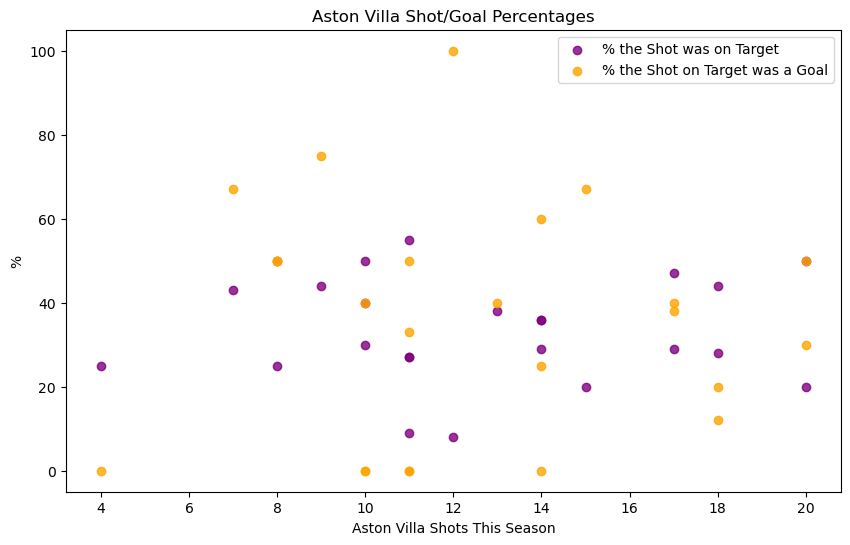

In [78]:
#Plotting both metrics - shots/goals etc.

plt.figure(figsize=(10, 6))

plt.scatter(X, Y1, color='purple', label='% the Shot was on Target', alpha=0.8)

plt.scatter(X, Y2, color='orange', label='% the Shot on Target was a Goal', alpha=0.8)


plt.title(Home_Team + ' Shot/Goal Percentages')
plt.xlabel(Home_Team + ' Shots This Season')
plt.ylabel('%')
plt.legend()

plt.show()

## Home team possesion to shots/goals plot

 Aston Villa Overall Possesion Plots 2024/2025: 


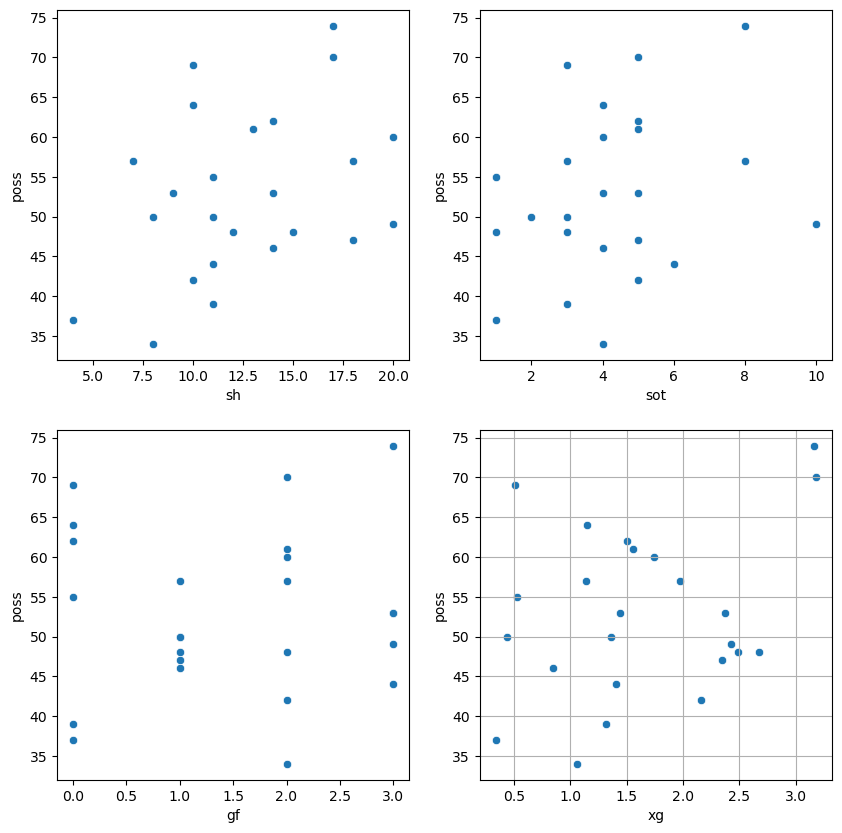

In [79]:
#Possession to various stats - home team

HomeShots_Goals = averageHomeOverall[["gf","xg","sh","sot","opponent","venue","poss"]]

print('\033[1m',Home_Team + " Overall Possesion Plots 2024/2025:",'\033[0m')

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.style.use("dark_background")
#Shots plot
sns.scatterplot(x = "sh", y = "poss", data = HomeShots_Goals, ax=axs[0, 0])

#Shots on target plot
sns.scatterplot(x = "sot", y = "poss", data = HomeShots_Goals, ax=axs[0, 1])

#Expected Goals for boxplot
sns.scatterplot(x = "gf", y = "poss", data = HomeShots_Goals, ax=axs[1, 0])

#Expected Goals for boxplot
sns.scatterplot(x = "xg", y = "poss", data = HomeShots_Goals, ax=axs[1, 1]);

plt.grid(True)

## Away Teams shots - goals and possesion stats

In [80]:
#AWAY TEAM - Shots - shots on target percentage and shots on target to goals percentage

averageAwayOverall["Shots On Target Percentage"]= (averageAwayOverall["sot"] / averageAwayOverall["sh"]*100).round()
averageAwayOverall["Shots On Target To Goals Percentage"]= (averageAwayOverall["gf"] / averageAwayOverall["sot"]*100).round()
AwayShotsToGoals = averageAwayOverall[["venue","result","opponent", "gf",
                                   "poss","sh","sot", "Shots On Target Percentage",
                                  "Shots On Target To Goals Percentage"]]

print('\033[1m',Away_Team + " Shot to goals and possesion Stats 2024/2025:",'\033[0m')
AwayShotsToGoals

 Liverpool Shot to goals and possesion Stats 2024/2025: 


,venue,result,opponent,gf,poss,sh,sot,Shots On Target Percentage,Shots On Target To Goals Percentage
264,Away,W,Ipswich,2,38,18,5.0,28.0,40.0
265,Home,W,Brentford,2,63,19,8.0,42.0,25.0
266,Away,W,Manchester United,3,47,11,3.0,27.0,100.0
267,Home,L,Nottingham Forest,0,69,14,5.0,36.0,0.0
268,Home,W,Bournemouth,3,59,19,13.0,68.0,23.0
269,Away,W,Wolverhampton Wanderers,2,56,10,6.0,60.0,33.0
270,Away,W,Crystal Palace,1,69,16,4.0,25.0,25.0
271,Home,W,Chelsea,2,42,8,5.0,62.0,40.0
272,Away,D,Arsenal,2,55,9,3.0,33.0,67.0
273,Home,W,Brighton and Hove Albion,2,48,16,8.0,50.0,25.0


 Liverpool Possesion Overall Plots 2024/2025: 


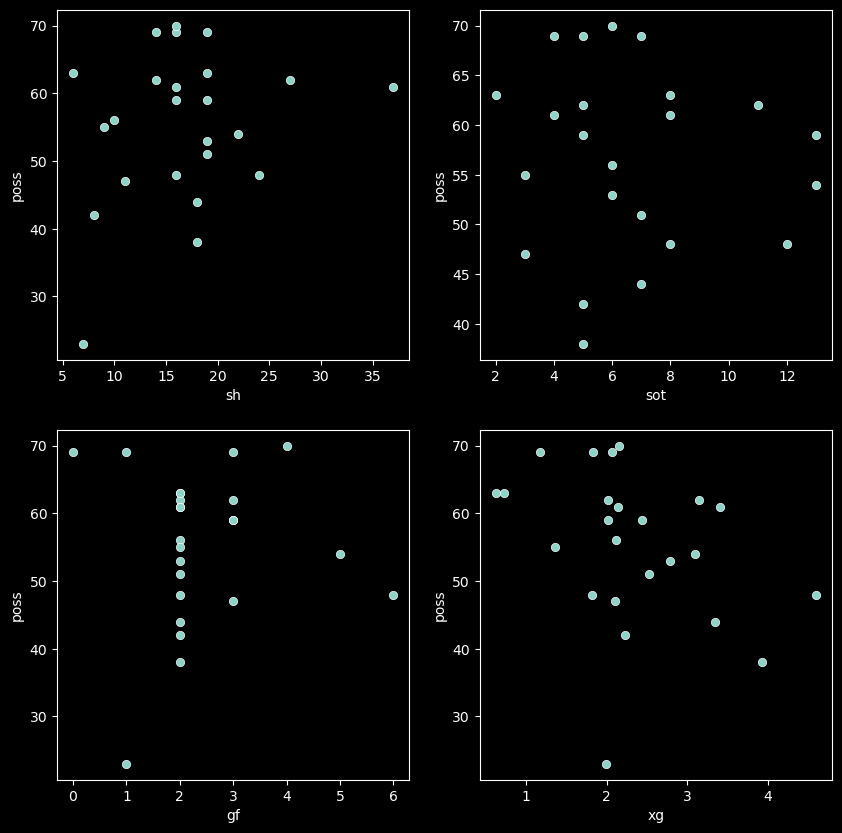

In [81]:
#Possession to various stats - home team

AwayShots_Goals = averageAwayOverall[["gf","xg","sh","sot","opponent","venue","poss"]]

print('\033[1m',Away_Team + " Possesion Overall Plots 2024/2025:",'\033[0m')

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

#Shots plot
sns.scatterplot(x = "sh", y = "poss", data = AwayShots_Goals, ax=axs[0, 0])

#Shots on target plot
sns.scatterplot(x = "sot", y = "poss", data = AwayShots_Goals, ax=axs[0, 1])

#Expected Goals for boxplot
sns.scatterplot(x = "gf", y = "poss", data = AwayShots_Goals, ax=axs[1, 0])

#Expected Goals for boxplot
sns.scatterplot(x = "xg", y = "poss", data = AwayShots_Goals, ax=axs[1, 1]);

# Teams vs Opponents based on Opponents league Position league positions

In [82]:
prem_positions = run_Season_dataset(Chosen_season)

Running dataset containing data from 2023/2024 Season


In [83]:
prem_positions.head()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
988,2023-08-11,Away,W,3,0,Burnley,1.9,0.3,65,17,8,13.9,Manchester City,Fri 20:00,19
989,2023-08-19,Home,W,1,0,Newcastle United,1.0,0.3,59,14,4,17.9,Manchester City,Sat 20:00,7
990,2023-08-27,Away,W,2,1,Sheffield Utd,3.5,0.7,79,29,9,17.3,Manchester City,Sun 14:00,20
991,2023-09-02,Home,W,5,1,Fulham,2.2,1.4,68,6,4,14.8,Manchester City,Sat 15:00,13
992,2023-09-16,Away,W,3,1,West Ham United,3.6,0.9,68,29,13,16.4,Manchester City,Sat 15:00,9


In [84]:
prem_positions["opponent"].unique()

array(['Burnley', 'Newcastle United', 'Sheffield Utd', 'Fulham',
       'West Ham United', 'Nottingham Forest', 'Wolverhampton Wanderers',
       'Arsenal', 'Brighton and Hove Albion', 'Manchester United',
       'Bournemouth', 'Chelsea', 'Liverpool', 'Tottenham Hotspur',
       'Aston Villa', 'Luton Town', 'Crystal Palace', 'Everton',
       'Brentford', 'Manchester City'], dtype=object)

In [85]:
HOME_team_Perf = prem_positions[(prem_positions["team"] == Home_Team)]
team_PerformanceVS_prem_positions = HOME_team_Perf[(HOME_team_Perf["venue"] == "Home")]

AWAY_team_Perf = prem_positions[(prem_positions["team"] == Away_Team)]
Awayteam_PerformanceVS_prem_positions = AWAY_team_Perf[(AWAY_team_Perf["venue"] == "Away")]
team_PerformanceVS_prem_positions.head()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
1103,2023-08-20,Home,W,4,0,Everton,2.9,0.6,60,12,6,18.5,Aston Villa,Sun 14:00,15
1106,2023-09-16,Home,W,3,1,Crystal Palace,3.0,1.2,66,15,4,16.2,Aston Villa,Sat 15:00,10
1108,2023-09-30,Home,W,6,1,Brighton and Hove Albion,1.6,1.7,39,19,9,17.9,Aston Villa,Sat 12:30,11
1110,2023-10-22,Home,W,4,1,West Ham United,1.9,1.1,58,14,6,19.6,Aston Villa,Sun 16:30,9
1111,2023-10-29,Home,W,3,1,Luton Town,2.3,0.5,70,17,6,14.5,Aston Villa,Sun 14:00,18


In [86]:
#Finding opponents league position

g= team_PerformanceVS_prem_positions[(team_PerformanceVS_prem_positions["opponent"] == Away_Team)]
g

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
1138,2024-05-13,Home,D,3,3,Liverpool,3.1,1.7,41,19,5,15.2,Aston Villa,Mon 20:00,3


In [87]:
#Conditions for opponent position

#Home Team performance vs top 4 teams from 2023/2024
HOME_team_PerformanceVS_top4 = team_PerformanceVS_prem_positions[(team_PerformanceVS_prem_positions["Premier League Finish Position"] >= 1) & (team_PerformanceVS_prem_positions["Premier League Finish Position"] <= 4)];

#Home Team performance vs outiside top 4 teams from 2023/2024
HOME_team_PerformanceVS_TopMidTable = team_PerformanceVS_prem_positions[(team_PerformanceVS_prem_positions["Premier League Finish Position"] >= 5) & (team_PerformanceVS_prem_positions["Premier League Finish Position"] <= 10)];

#Home Team performance vs mid table from 2023/2024
HOME_team_PerformanceVS_midTable = team_PerformanceVS_prem_positions[(team_PerformanceVS_prem_positions["Premier League Finish Position"] >= 11) & (team_PerformanceVS_prem_positions["Premier League Finish Position"] <= 16)];

#Home Team performance vs bottom teams from 2023/2024
HOME_team_PerformanceVS_bottomTable = team_PerformanceVS_prem_positions[(team_PerformanceVS_prem_positions["Premier League Finish Position"] >= 17) & (team_PerformanceVS_prem_positions["Premier League Finish Position"] <= 20)];

In [88]:
#Function to run condition based on opponents position

def run_Table_position(g):
        
    if g["Premier League Finish Position"].between(0,4).any():
        #tablePosition == "Top Four Clubs"
        print("Top Four Clubs")
        return HOME_team_PerformanceVS_top4
    
    elif g["Premier League Finish Position"].between(5,10).any():
        #tablePosition == "Upper Mid Table Clubs"
        print("Upper Mid Table Clubs")
        return HOME_team_PerformanceVS_TopMidTable
        
    elif g["Premier League Finish Position"].between(11,16).any():
        #tablePosition == "Lower Mid Table Clubs"
        print("Lower Mid Table Clubs")
        return HOME_team_PerformanceVS_midTable
        
    else:
        #tablePosition = "Bottom Four Clubs"
        print("Bottom Four Clubs")
        return HOME_team_PerformanceVS_bottomTable

# result1 = run_Table_position(g)
# print(result1)

In [89]:
#saving positional dataset to variable

homePerfRecord = run_Table_position(g)
# homePerfRecordResult = homePerfRecord["result"].value_counts(normalize=True)*100
# homePerfRecordResult

Top Four Clubs


In [90]:
numOFGames = len(homePerfRecord["opponent"])
numOFGames

3

## Generating Stats based on the Opponents position

 Aston Villa Home Results out of 6 Games Against Upper Mid Table Clubs 


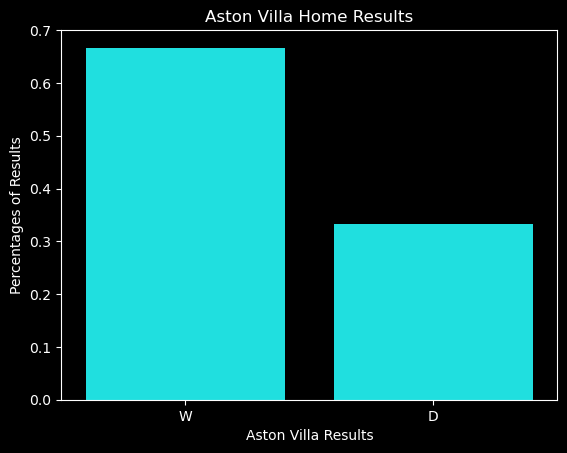

In [91]:
#Home results against other teams of similar position to opponent

x, y = "result", "Per Centages"

print('\033[1m',Home_Team + " Home Results out of 6 Games Against Upper Mid Table Clubs", '\033[0m')

(homePerfRecord[x]
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y,
       color="cyan").set(title=Home_Team +' Home Results', 
                            xlabel=Home_Team +' Results', ylabel='Percentages of Results'));

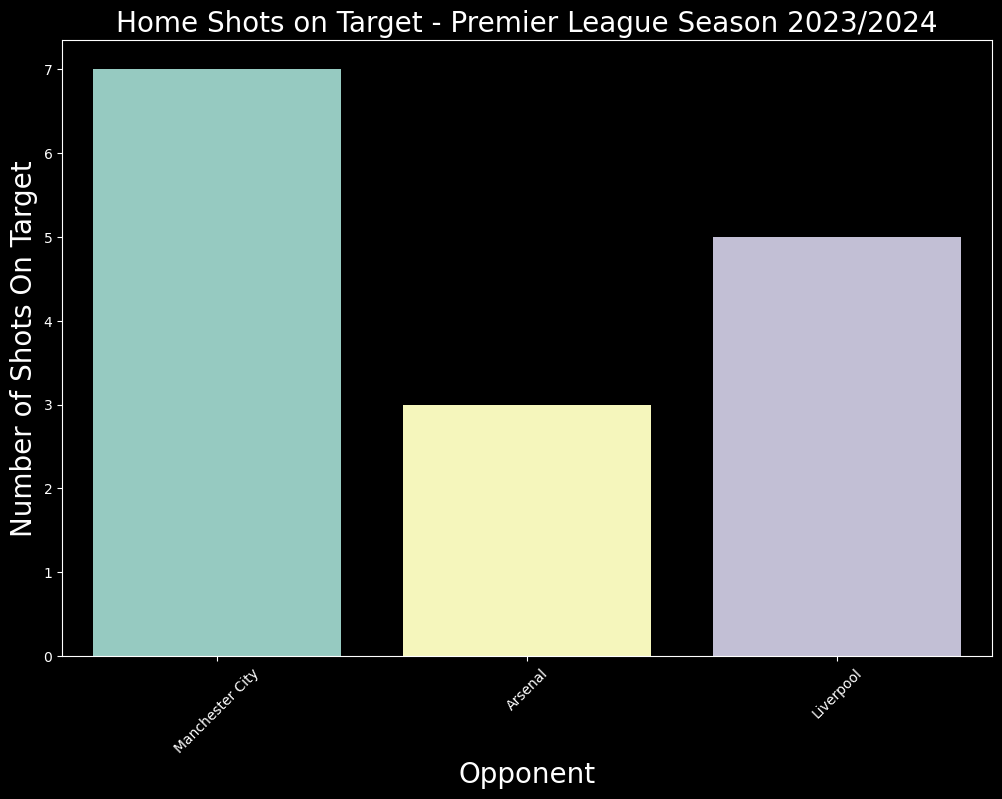

In [92]:
#Home shots on target against other teams of similar position to opponent

plt.style.use("dark_background")
plt.figure(figsize = (12,8))
sns.barplot(data=homePerfRecord, x="opponent",y = "sot")
plt.xticks(rotation=45)
plt.xlabel("Opponent", fontsize=20)
plt.ylabel("Number of Shots On Target", fontsize=20)
plt.title("Home Shots on Target - " + Chosen_season, fontsize = 20)
plt.show()

In [93]:
homePerfRecord.reset_index(drop = True, inplace = True)
homePerfRecord

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
0,2023-12-06,Home,W,1,0,Manchester City,2.3,0.6,46,22,7,18.9,Aston Villa,Wed 20:15,1
1,2023-12-09,Home,W,1,0,Arsenal,0.6,1.4,39,10,3,20.8,Aston Villa,Sat 17:30,2
2,2024-05-13,Home,D,3,3,Liverpool,3.1,1.7,41,19,5,15.2,Aston Villa,Mon 20:00,3


In [94]:
possescionHOME= homePerfRecord[["opponent","poss"]]
# possescionHOME["awayPos"] = 100 - possescionHOME["poss"]
# r = len(possescionHOME["opponent"])-1
# possescionHOME["opponent"][r]

In [95]:
df123 = possescionHOME[["opponent","poss"]]
df123.head()

,opponent,poss
0,Manchester City,46
1,Arsenal,39
2,Liverpool,41


In [96]:

avgPOSS = df123["poss"].mean().round()
print(Home_Team + " Average Possession Against Opponents of Similar Position to " + Away_Team, ":" , avgPOSS,"%")

Aston Villa Average Possession Against Opponents of Similar Position to Liverpool : 42.0 %


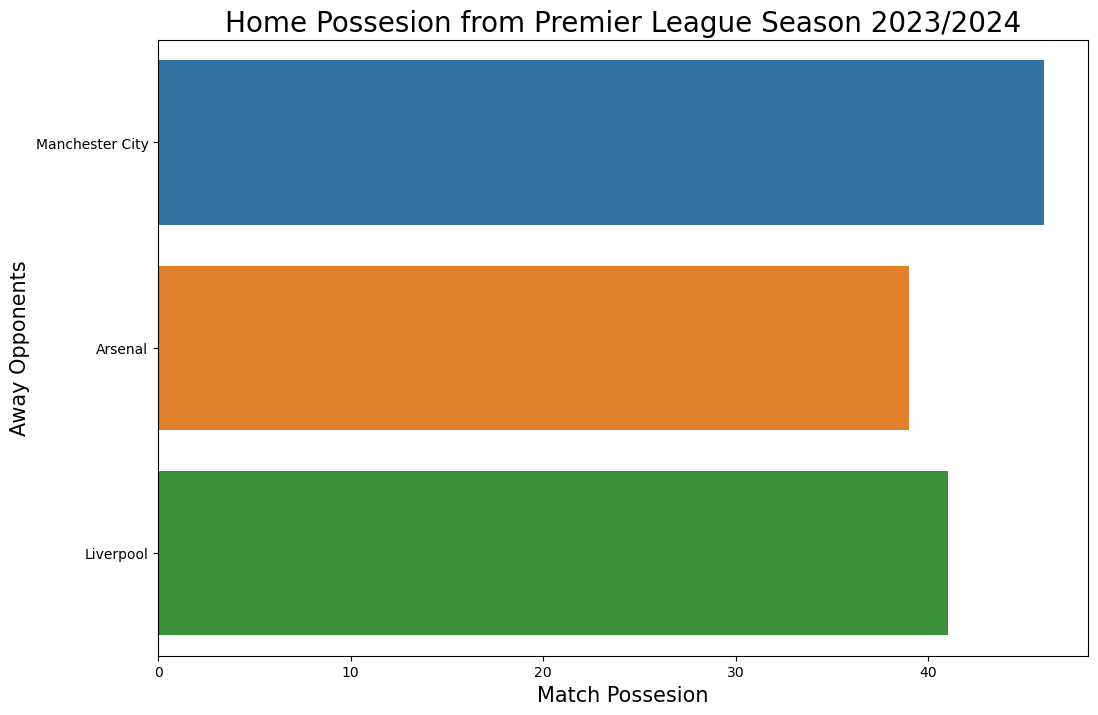

In [97]:
#Home possession against other teams of similar position to opponent

plt.style.use("default")
plt.figure(figsize = (12,8))
sns.barplot(x = "poss", y = "opponent", data = df123)
plt.ylabel("Away Opponents", fontsize=15)
plt.xlabel("Match Possesion", fontsize=15)
plt.title("Home Possesion from " + Chosen_season, fontsize=20)
plt.show()

## Does higher possesion lead to winning matches?

In [98]:
possWin_Rate = dropped_teams

In [99]:
#Per centage of possesion between 50% - 60%
mid_possWin_Rate = possWin_Rate[(possWin_Rate["poss"] > 50) & (possWin_Rate["poss"] <= 60)];
HomeMidPossPerC = mid_possWin_Rate[mid_possWin_Rate["venue"] == "Home"].groupby("team")["result"].apply(lambda x: (x == "W").sum())
HomeMidPossgames = mid_possWin_Rate[mid_possWin_Rate["venue"] == "Home"].groupby("team")["result"].count()

In [100]:
HOMEperCENTmidPoss=HomeMidPossPerC/HomeMidPossgames*100
#HomePossPerC
#HOMEperCENTmidPoss

In [101]:
#Per centage of possesion above 60% 
high_possWin_Rate = possWin_Rate[(possWin_Rate["poss"] > 60)];
HomeHighPossPerC = high_possWin_Rate[high_possWin_Rate["venue"] == "Home"].groupby("team")["result"].apply(lambda x: (x == "W").sum())
HomeHighPossgames = high_possWin_Rate[high_possWin_Rate["venue"] == "Home"].groupby("team")["result"].count()

In [102]:
HOMEperCENTHighPoss=HomeHighPossPerC/HomeHighPossgames*100
#HOMEperCENTHighPoss

In [103]:
homePossWinPerC = pd.merge(HOMEperCENTmidPoss,HOMEperCENTHighPoss, on="team", suffixes=(" Home Wins Percentage with 50% - 60% Possesion"," Home Wins Percentage with Above 60% Possesion")).sort_values(by="result Home Wins Percentage with 50% - 60% Possesion" ,ascending = False).reset_index()

In [104]:
homePossWinPerC

,team,result Home Wins Percentage with 50% - 60% Possesion,result Home Wins Percentage with Above 60% Possesion
0,Liverpool,74.074074,74.576271
1,Manchester City,73.684211,79.166667
2,Arsenal,70.967742,65.789474
3,Tottenham Hotspur,66.666667,64.285714
4,Chelsea,59.090909,46.296296
5,Manchester United,55.172414,55.882353
6,Leicester City,52.173913,47.826087
7,Aston Villa,50.000000,50.000000
8,Newcastle United,50.000000,40.000000
9,Crystal Palace,48.275862,33.333333


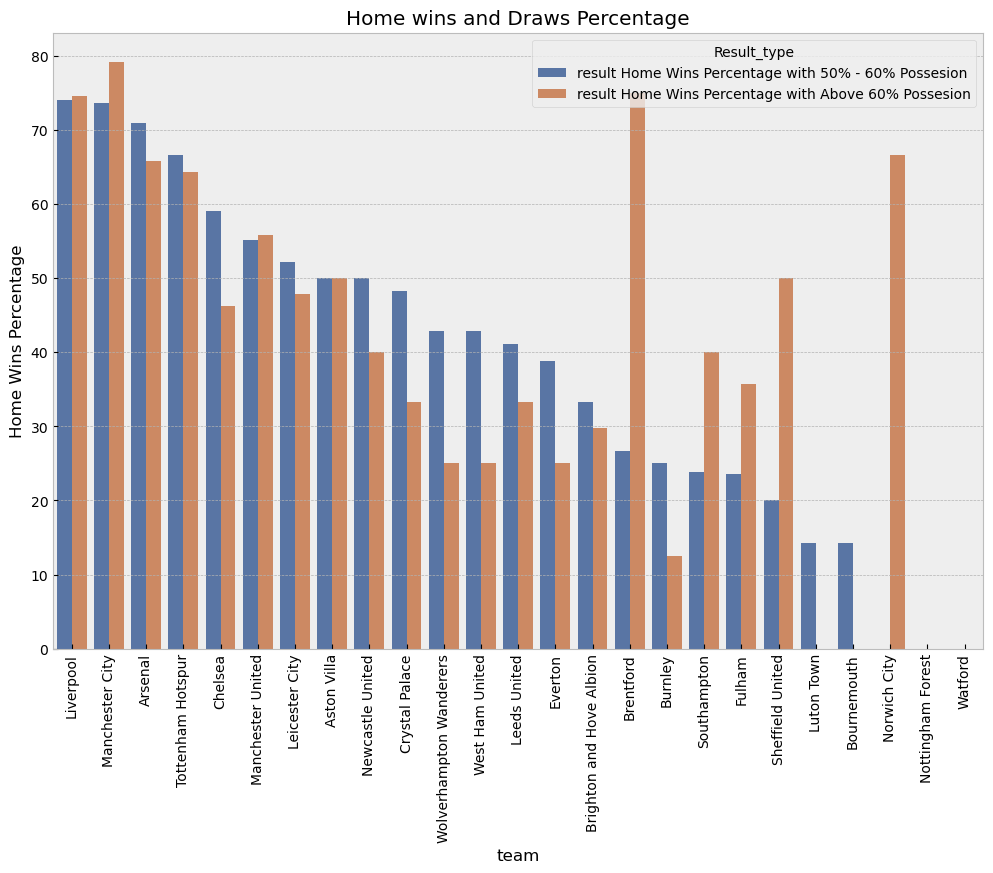

In [105]:
#BAr chart for higher possession - winning mathces percentage

homePossCombined = homePossWinPerC.melt(id_vars = "team", var_name = "Result_type", value_name = "Home Wins Percentage")
plt.style.use("bmh")

plt.figure(figsize = (12,8))
sns.barplot(x = "team", y = "Home Wins Percentage", 
            hue = "Result_type", 
            data = homePossCombined, palette = "deep")
plt.xticks(rotation=90)
plt.title("Home wins and Draws Percentage")
plt.show()

# Building Models

### EDA and Data Preparation

In [106]:
dropped_teams.describe()

,gf,ga,xg,xga,poss,sh,sot,dist,fk,pk,pkatt
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,1.436579,1.436579,1.394789,1.394789,50.001053,12.607895,4.232632,17.260305,0.449211,0.123684,0.151316
std,1.298623,1.298623,0.827473,0.827473,12.767692,5.563999,2.463546,3.028018,0.661465,0.351685,0.387347
min,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,5.300000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.800000,0.800000,40.000000,9.000000,2.000000,15.300000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.300000,1.300000,50.000000,12.000000,4.000000,17.100000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,1.900000,1.900000,60.000000,16.000000,6.000000,19.000000,1.000000,0.000000,0.000000
max,9.000000,9.000000,7.000000,7.000000,82.000000,36.000000,15.000000,39.900000,4.000000,3.000000,3.000000


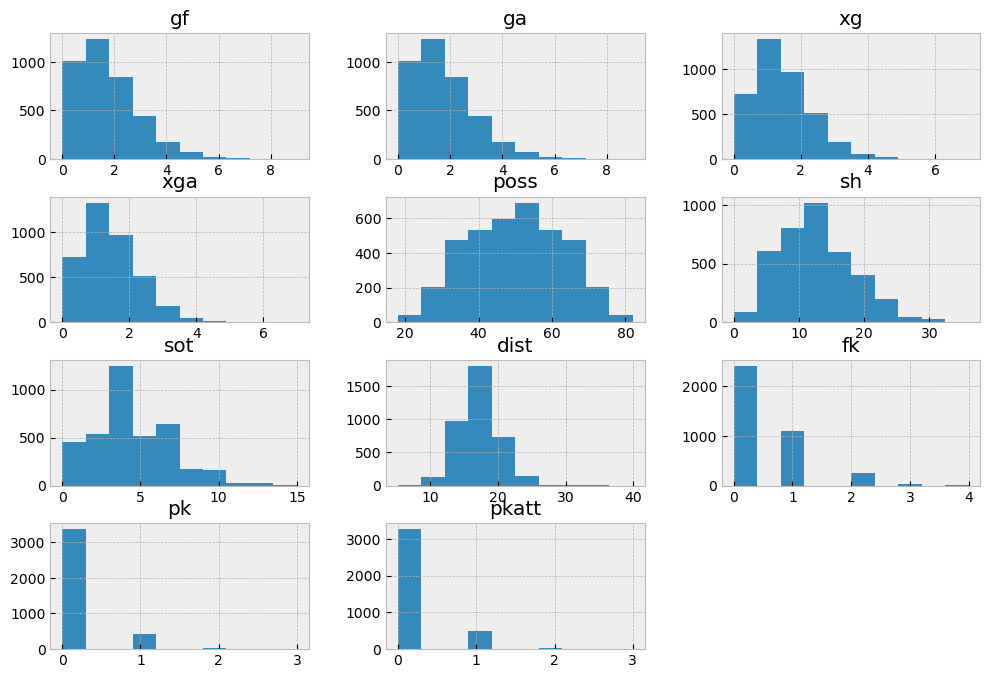

In [107]:
dropped_teams.hist(figsize=(12,8));

<Axes: xlabel='sot'>

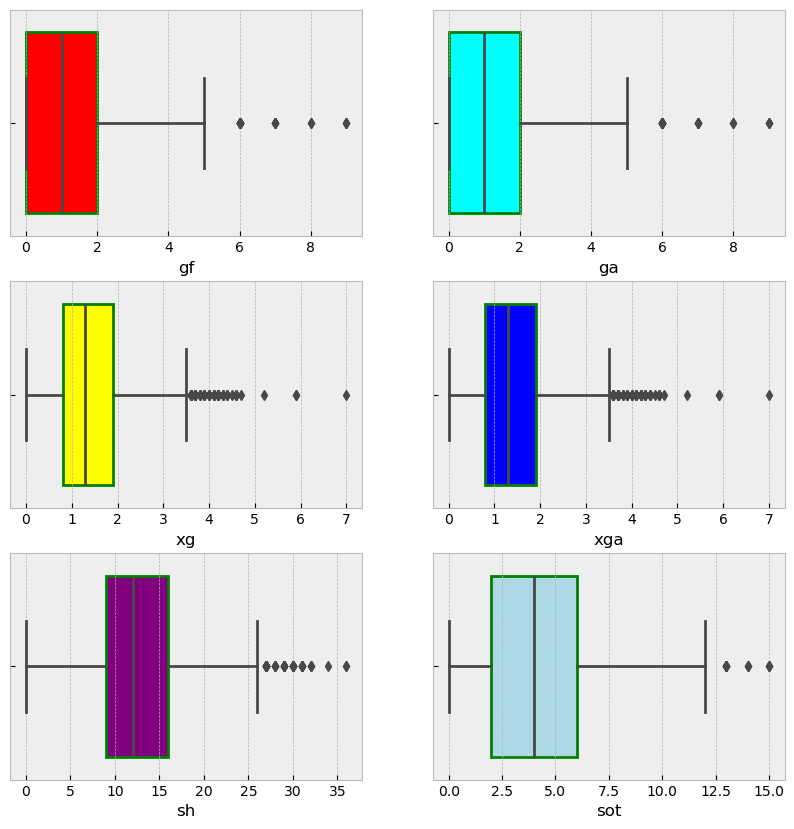

In [108]:
#I created a box plot grid to view for outliers. I selected the features in this grid by looking at each features max and median values.
#The features I selected were Goals for, Expected goals for, expected goals against and Shot.

fig, axs = plt.subplots(3, 2, figsize=(10, 10))

#Goals for boxplot
sns.boxplot(data = dropped_teams, x = dropped_teams["gf"], ax=axs[0, 0]
            ,boxprops={'color': 'green', 'facecolor': 'red'})
#axs[0,0].set_title("Goals For")

#Goals for boxplot
sns.boxplot(data = dropped_teams, x = dropped_teams["ga"], ax=axs[0, 1]
            ,boxprops={'color': 'green', 'facecolor': 'cyan'})
#axs[0,1].set_title("Goals Against")

#Expected Goals for boxplot
sns.boxplot(data = dropped_teams, x = dropped_teams["xg"], ax=axs[1, 0]
            ,boxprops={'color': 'green', 'facecolor': 'yellow'})
#axs[1,0].set_title("Expected Goals For")

#Expected Goals Against boxplot
sns.boxplot(data = dropped_teams, x = dropped_teams["xga"], ax=axs[1, 1]
            ,boxprops={'color': 'green', 'facecolor': 'blue'})
#axs[1,1].set_title("Expected Goals Against")

#Shots for boxplot
sns.boxplot(data = dropped_teams, x = dropped_teams["sh"], ax=axs[2,0]
            ,boxprops={'color': 'green', 'facecolor': 'purple'})
#axs[2,0].set_title("Shots")

#Shots for boxplot
sns.boxplot(data = dropped_teams, x = dropped_teams["sot"], ax=axs[2,1]
            ,boxprops={'color': 'green', 'facecolor': 'lightblue'})
#axs[2,1].set_title("Shots on target")

In [109]:
df_outlier_detection = dropped_teams

In [110]:
df_outlier_detection.reset_index(drop=True, inplace=True)

In [111]:
featureOutlier = df_outlier_detection[["gf","ga","xg","xga","sh","sot","poss"]]
featureOutlier.reset_index(drop=True, inplace=True)
featureOutlier.head()

,gf,ga,xg,xga,sh,sot,poss
0,3,1,1.9,0.6,13,8,65
1,2,5,0.9,2.9,16,5,72
2,1,1,1.2,2.4,23,1,49
3,1,0,1.3,0.9,13,5,58
4,1,1,1.0,0.3,14,7,69


In [112]:
Q1 = featureOutlier.quantile(0.25)
Q3 = featureOutlier.quantile(0.75)

IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(featureOutlier >= upper)[0]
lower_array = np.where(featureOutlier <= lower)[0]


# # # Removing the outliers
df_outlier_detection.drop(index=upper_array, axis = 0,inplace=True)
df_outlier_detection.drop(index=lower_array, axis = 0,inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_outlier_detection.shape)

New Shape:  (3478, 18)


In [113]:
df_outlier_detection.reset_index(drop=True, inplace=True)
df_outlier_detection.describe()

,gf,ga,xg,xga,poss,sh,sot,dist,fk,pk,pkatt
count,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000
mean,1.320299,1.337550,1.319896,1.347700,49.792697,12.253594,4.044853,17.297861,0.445946,0.117309,0.143186
std,1.116095,1.125657,0.722748,0.738828,12.519522,5.037174,2.230144,2.993271,0.657108,0.340928,0.374900
min,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,5.300000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.800000,0.800000,40.000000,8.000000,2.000000,15.300000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.200000,1.200000,50.000000,12.000000,4.000000,17.200000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,1.800000,1.800000,59.000000,15.000000,5.000000,19.100000,1.000000,0.000000,0.000000
max,4.000000,4.000000,3.500000,3.500000,82.000000,26.000000,11.000000,35.200000,4.000000,3.000000,3.000000


In [114]:
Ml_Df = df_outlier_detection

In [115]:
Ml_Df.columns

Index(['date', 'venue', 'result', 'gf', 'ga', 'opponent', 'xg', 'xga', 'poss',
       'sh', 'sot', 'dist', 'team', 'DAY & TIME', 'fk', 'pk', 'pkatt',
       'formation'],
      dtype='object')

In [116]:
categorical_features = Ml_Df[["venue",
                              "result",
                              "opponent",
                               "team",
                             "DAY & TIME",
                             "date",
                             "formation"]]

df_corr = Ml_Df.drop(categorical_features, axis = 1)

In [117]:
df_corr

,gf,ga,xg,xga,poss,sh,sot,dist,fk,pk,pkatt
0,3,1,1.9,0.6,65,13,8,21.1,2,1,1
1,1,1,1.2,2.4,49,23,1,18.2,1,0,0
2,1,0,1.3,0.9,58,13,5,17.7,0,0,0
3,1,1,1.0,0.3,69,14,7,20.9,1,0,0
4,1,0,1.6,0.5,65,16,8,18.5,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3473,0,1,0.6,1.0,58,12,1,18.4,0,0,0
3474,1,2,1.2,1.2,56,12,3,16.9,1,0,0
3475,0,4,0.6,3.5,53,11,2,19.8,1,0,1
3476,0,1,0.1,2.5,33,2,0,20.6,2,0,0


Text(0.5, 1.0, 'Correlation Map Containing All Features')

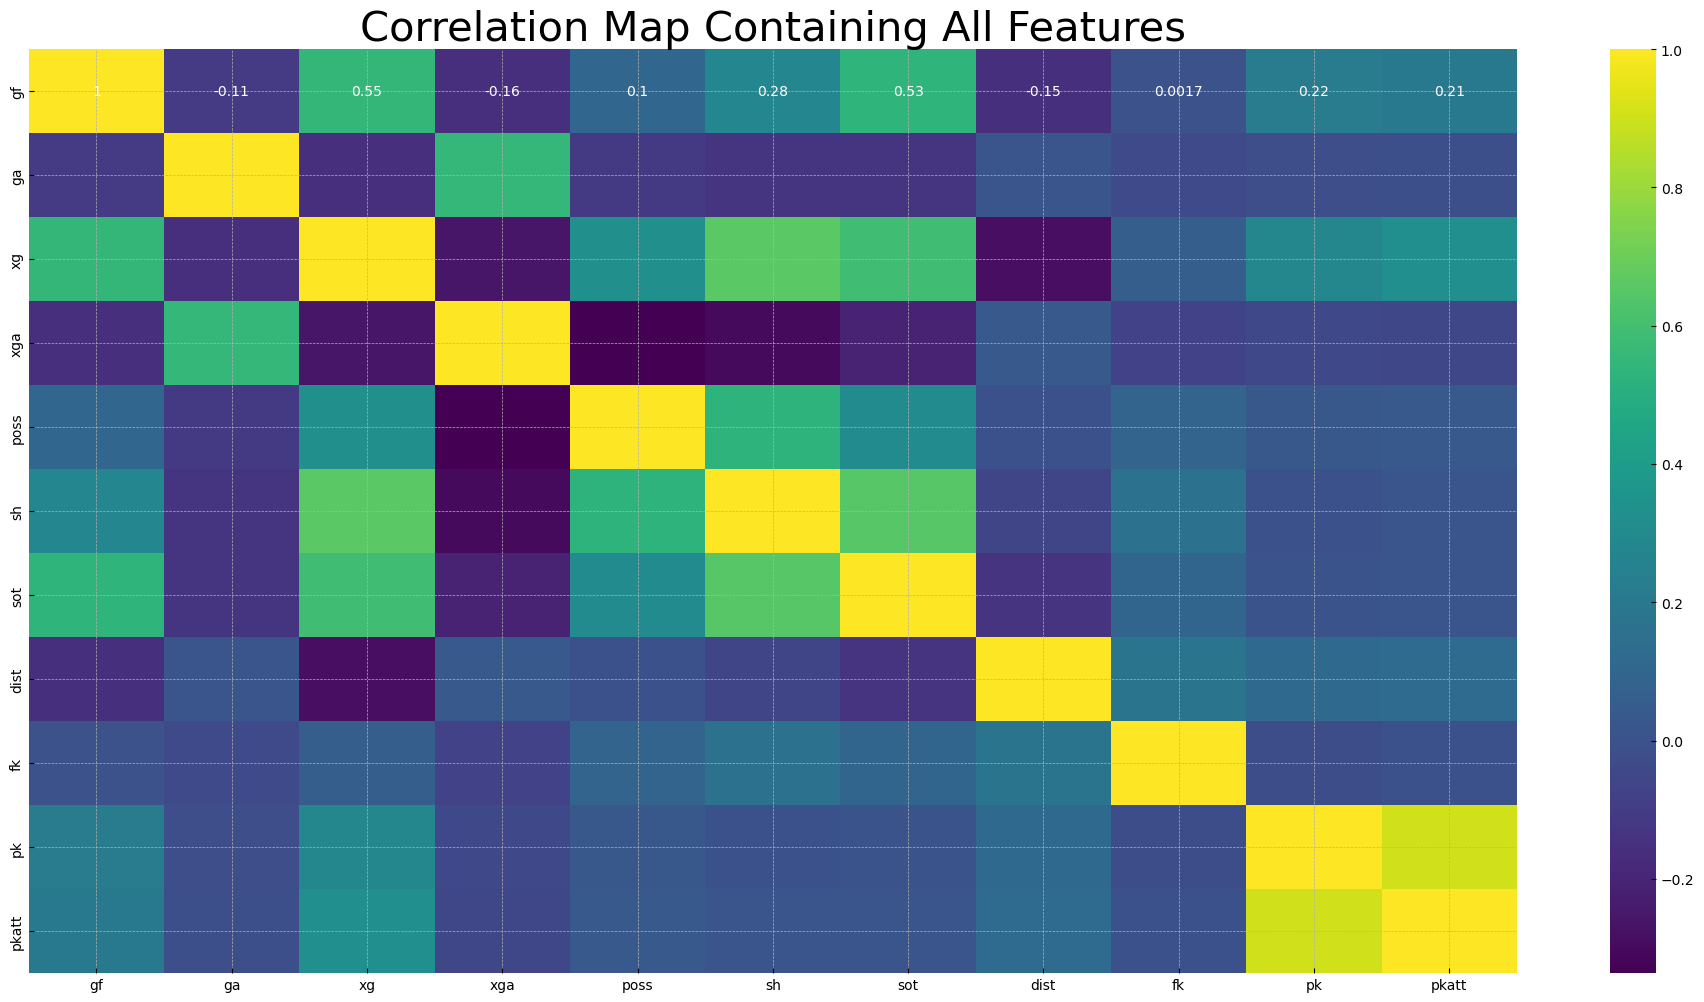

In [118]:
#create heatmap containing correlation matrix between features  
plt.figure(figsize=(24,12))
sns.heatmap(df_corr.corr(), annot=True, cmap = "viridis",annot_kws={'color': 'white'} )
plt.title("Correlation Map Containing All Features", fontsize=30)

## Linear Regression to Predict Goals Scored

In [119]:
LinReg_df = df_outlier_detection

In [120]:
LinReg_df

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,fk,pk,pkatt,formation
0,2020-09-21,Away,W,3,1,Wolverhampton Wanderers,1.9,0.6,65,13,8,21.1,Manchester City,Mon 20:15,2,1,1,4-2-3-1
1,2020-10-03,Away,D,1,1,Leeds United,1.2,2.4,49,23,1,18.2,Manchester City,Sat 17:30,1,0,0,4-3-3
2,2020-10-17,Home,W,1,0,Arsenal,1.3,0.9,58,13,5,17.7,Manchester City,Sat 17:30,0,0,0,3-1-4-2
3,2020-10-24,Away,D,1,1,West Ham United,1.0,0.3,69,14,7,20.9,Manchester City,Sat 12:30,1,0,0,4-3-3
4,2020-10-31,Away,W,1,0,Sheffield Utd,1.6,0.5,65,16,8,18.5,Manchester City,Sat 12:30,2,0,0,4-3-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,2020-07-04,Home,L,0,1,Brighton and Hove Albion,0.6,1.0,58,12,1,18.4,Norwich City,Sat 12:30,0,0,0,4-3-3
3474,2020-07-07,Away,L,1,2,Watford,1.2,1.2,56,12,3,16.9,Norwich City,Tue 18:00,1,0,0,4-3-3
3475,2020-07-11,Home,L,0,4,West Ham United,0.6,3.5,53,11,2,19.8,Norwich City,Sat 12:30,1,0,1,4-3-3
3476,2020-07-14,Away,L,0,1,Chelsea,0.1,2.5,33,2,0,20.6,Norwich City,Tue 20:15,2,0,0,4-3-3


In [121]:
LinReg_drop_features = LinReg_df[["DAY & TIME","date","formation"]]

LinReg_df.drop(LinReg_drop_features, axis = 1, inplace=True)

In [122]:
features_toEncode = ["result",'venue', 'opponent', 'team']

#Storing the new a new dataset of encoded values in feature_ne
encoder = OneHotEncoder(drop='first', sparse=True, dtype=np.int32)
fresh_features = encoder.fit_transform(LinReg_df[features_toEncode])
column_heading = encoder.get_feature_names_out(features_toEncode)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [123]:
New_df = pd.DataFrame(fresh_features.toarray(), columns=column_heading)

In [124]:
#joining the new encoded features with the existing dataset
complete_df = pd.concat([LinReg_df,New_df], axis =1)
complete_df.shape

(3478, 68)

In [125]:
complete_df.drop(columns = ["venue","opponent", "team", "result"], inplace= True)

In [126]:
# #Converting to integers
# integer_conversion = ["xg","xga","dist"]

# for values in integer_conversion:
#     complete_df[values]=complete_df[values].astype(int)

In [127]:
complete_df.head()

,gf,ga,xg,xga,poss,sh,sot,dist,fk,pk,pkatt,result_L,result_W,venue_Home,opponent_Aston Villa,opponent_Bournemouth,opponent_Brentford,opponent_Brighton and Hove Albion,opponent_Burnley,opponent_Chelsea,opponent_Crystal Palace,opponent_Everton,opponent_Fulham,opponent_Leeds United,opponent_Leicester City,opponent_Liverpool,opponent_Luton Town,opponent_Manchester City,opponent_Manchester United,opponent_Newcastle United,opponent_Norwich City,opponent_Nottingham Forest,opponent_Sheffield Utd,opponent_Southampton,opponent_Tottenham Hotspur,opponent_Watford,opponent_West Bromwich Albion,opponent_West Ham United,opponent_Wolverhampton Wanderers,team_Aston Villa,team_Bournemouth,team_Brentford,team_Brighton and Hove Albion,team_Burnley,team_Chelsea,team_Crystal Palace,team_Everton,team_Fulham,team_Leeds United,team_Leicester City,team_Liverpool,team_Luton Town,team_Manchester City,team_Manchester United,team_Newcastle United,team_Norwich City,team_Nottingham Forest,team_Sheffield United,team_Southampton,team_Tottenham Hotspur,team_Watford,team_West Bromwich Albion,team_West Ham United,team_Wolverhampton Wanderers
0,3,1,1.9,0.6,65,13,8,21.1,2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1.2,2.4,49,23,1,18.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1.3,0.9,58,13,5,17.7,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1.0,0.3,69,14,7,20.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1.6,0.5,65,16,8,18.5,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [128]:
complete_df[["fk","pk","pkatt"]] = dropped_teams[["fk","pk","pkatt"]]

In [129]:
complete_df[["ga", "poss", "sh", "sot"]] = complete_df[["ga", "poss", "sh", "sot"]].astype(float)

# Building Models

 ## Linear Regression

In [130]:
X = complete_df.drop(columns = ["gf","fk","pk","pkatt","dist"])
y = complete_df["gf"]

In [131]:
X.head()

,ga,xg,xga,poss,sh,sot,result_L,result_W,venue_Home,opponent_Aston Villa,opponent_Bournemouth,opponent_Brentford,opponent_Brighton and Hove Albion,opponent_Burnley,opponent_Chelsea,opponent_Crystal Palace,opponent_Everton,opponent_Fulham,opponent_Leeds United,opponent_Leicester City,opponent_Liverpool,opponent_Luton Town,opponent_Manchester City,opponent_Manchester United,opponent_Newcastle United,opponent_Norwich City,opponent_Nottingham Forest,opponent_Sheffield Utd,opponent_Southampton,opponent_Tottenham Hotspur,opponent_Watford,opponent_West Bromwich Albion,opponent_West Ham United,opponent_Wolverhampton Wanderers,team_Aston Villa,team_Bournemouth,team_Brentford,team_Brighton and Hove Albion,team_Burnley,team_Chelsea,team_Crystal Palace,team_Everton,team_Fulham,team_Leeds United,team_Leicester City,team_Liverpool,team_Luton Town,team_Manchester City,team_Manchester United,team_Newcastle United,team_Norwich City,team_Nottingham Forest,team_Sheffield United,team_Southampton,team_Tottenham Hotspur,team_Watford,team_West Bromwich Albion,team_West Ham United,team_Wolverhampton Wanderers
0,1.0,1.9,0.6,65.0,13.0,8.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1.2,2.4,49.0,23.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.0,1.3,0.9,58.0,13.0,5.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,0.3,69.0,14.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.0,1.6,0.5,65.0,16.0,8.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [132]:
# random_state is the seed used by the random number generator, it can be any integer.
# Splitting data into testing and training. First I will employ an 80/20 split. 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80 , random_state = 42)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3478, 59), (3478,), (2782, 59), (696, 59), (2782,), (696,))

In [133]:
from sklearn.linear_model import LinearRegression

Lr_reg1 = LinearRegression()

Lr_reg1.fit(X_train, y_train)
y_pred = Lr_reg1.predict(X_test)

In [134]:
print("Lr_reg : Training set score: {:.2f}".format(Lr_reg1.score(X_train, y_train))) 
print("Lr_reg : Test set score: {:.2f}".format(Lr_reg1.score(X_test, y_test)))

Lr_reg : Training set score: 0.73
Lr_reg : Test set score: 0.72


In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mean_ab_errorLin = mean_absolute_error(y_test, y_pred)
mean_sq_errorLin = mean_squared_error(y_test, y_pred)
root_mean_sq_errorLin = mean_sq_errorLin ** 0.5
r2Lin = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mean_ab_errorLin}")
print(f"Mean Squared Error (MSE): {mean_sq_errorLin}")
print(f"Root Mean Squared Error (RMSE): {root_mean_sq_errorLin}")
print(f"R^2 (Coefficient of Determination): {r2Lin}")

Mean Absolute Error (MAE): 0.4793258796369343
Mean Squared Error (MSE): 0.36225422563197135
Root Mean Squared Error (RMSE): 0.6018755898289707
R^2 (Coefficient of Determination): 0.7245526175501985


 Linear Regression Excluding Goals Against 


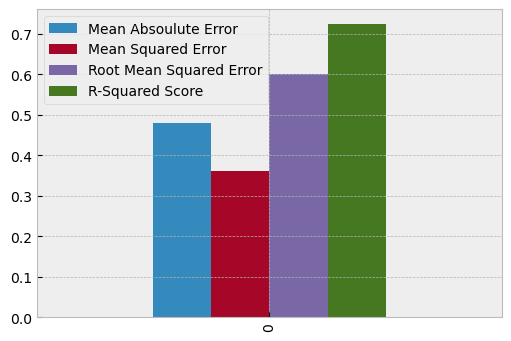

In [136]:
Compare_metrics_LIN = pd.DataFrame({"Mean Absoulute Error" : mean_ab_errorLin,
                               "Mean Squared Error": mean_sq_errorLin,
                               "Root Mean Squared Error": root_mean_sq_errorLin,
                               "R-Squared Score": r2Lin},index=[0])

print('\033[1m',"Linear Regression Excluding Goals Against",'\033[0m')
Compare_metrics_LIN.plot.bar(figsize=(6,4));

In [137]:
Prem_df__Goals_scored = pd.DataFrame({'Goals_scored Actual': y_test, 'Linear REG Goals_scored Predicted': y_pred})

print('\033[1m',"Linear Regression Predictions vs Actual 80/20 Split",'\033[0m')
Prem_df__Goals_scored.head(10)

 Linear Regression Predictions vs Actual 80/20 Split 


,Goals_scored Actual,Linear REG Goals_scored Predicted
3312,0,0.511574
1427,1,0.828049
309,0,0.445822
1313,0,0.962540
3038,1,0.730959
51,3,2.497252
965,0,0.393022
1767,1,1.632722
2163,1,1.678531
1510,1,1.028337


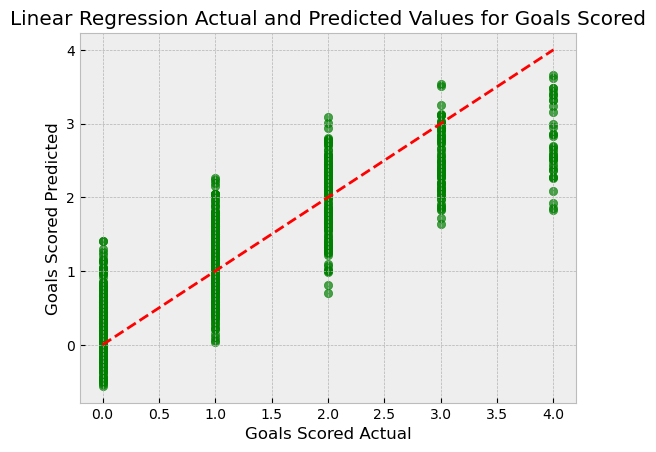

In [138]:
plt.scatter(Prem_df__Goals_scored["Goals_scored Actual"],Prem_df__Goals_scored["Linear REG Goals_scored Predicted"], color='green', alpha=0.7)
plt.plot([Prem_df__Goals_scored['Goals_scored Actual'].min(), Prem_df__Goals_scored['Goals_scored Actual'].max()],
         [Prem_df__Goals_scored['Goals_scored Actual'].min(), Prem_df__Goals_scored['Goals_scored Actual'].max()],
         color='red', linestyle='--', label='y = x (Line of Perfect Prediction)')
plt.xlabel("Goals Scored Actual")
plt.ylabel("Goals Scored Predicted")
plt.title("Linear Regression Actual and Predicted Values for Goals Scored")
plt.grid(True)
plt.show()

# =========================================================

## Random Forest Regressor

In [139]:
from sklearn.ensemble import RandomForestRegressor

X_train_RF_Reg, X_test_RF_Reg, y_train_RF_Reg, y_test_RF_Reg = train_test_split(X, y, train_size = 0.70 , random_state = 42)

RF_reg = RandomForestRegressor(n_estimators = 100).fit(X_train_RF_Reg, y_train_RF_Reg)

y_pred_RF_Reg = RF_reg.predict(X_test_RF_Reg)

In [140]:
print("Random Forrest Regression : Training set score: {:.2f}".format(RF_reg.score(X_train_RF_Reg, y_train_RF_Reg))) 
print("Random Forrest Regression : {:.2f}".format(RF_reg.score(X_test_RF_Reg, y_test_RF_Reg)))

Random Forrest Regression : Training set score: 0.96
Random Forrest Regression : 0.75


In [141]:
# Calculate evaluation metrics
mean_ab_errorRF = mean_absolute_error(y_test_RF_Reg, y_pred_RF_Reg)
mean_sq_errorRF = mean_squared_error(y_test_RF_Reg, y_pred_RF_Reg)
root_mean_sq_errorRF = mean_sq_errorRF ** 0.5
r2RF = r2_score(y_test_RF_Reg, y_pred_RF_Reg)

# Print evaluation metrics
print('\033[1m',"Evaluation metrics before Hyper Paramter Tuning",'\033[0m')
print("\n")
print(f"Mean Absolute Error (MAE): {mean_ab_errorRF}")
print(f"Mean Squared Error (MSE): {mean_sq_errorRF}")
print(f"Root Mean Squared Error (RMSE): {root_mean_sq_errorRF}")
print(f"R^2 (Coefficient of Determination): {r2RF}")

 Evaluation metrics before Hyper Paramter Tuning 


Mean Absolute Error (MAE): 0.36607279693486583
Mean Squared Error (MSE): 0.3176639846743295
Root Mean Squared Error (RMSE): 0.5636168775634114
R^2 (Coefficient of Determination): 0.7522444594555915


 Random Forest Excluding Goals Against 


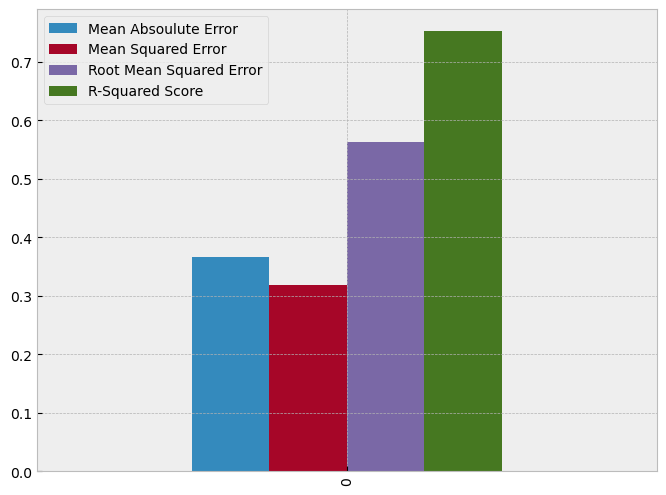

In [142]:
Compare_metrics_RF = pd.DataFrame({"Mean Absoulute Error" : mean_ab_errorRF,
                               "Mean Squared Error": mean_sq_errorRF,
                               "Root Mean Squared Error": root_mean_sq_errorRF,
                               "R-Squared Score": r2RF},index=[0])

print('\033[1m',"Random Forest Excluding Goals Against",'\033[0m')
Compare_metrics_RF.plot.bar(figsize=(8,6));

### Hyperparamter Tuning

In [143]:
RF_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [144]:
# #I using the .best_estimator parameter to find the correct amount of features and n_estimators to use to ensure the model is workign to highest standard it can.
# #Using grid search cross validation to find the best parameters for the decision tree.
# #Using grid search cross validation to find the best parameters for the decision tree.
# from sklearn.model_selection import GridSearchCV

# RF_Reg1 = RandomForestRegressor()

# value_grid ={ 
#  'n_estimators': [100,200,300],
#  'max_depth':[None, 5,10],
#  'max_features': [1, 100],
#  'min_samples_split': [4],
#  'min_samples_leaf': [2]
# #  ,'max_leaf_nodes': [41],
# #  'min_samples_leaf': [500],
# #  'min_weight_fraction_leaf':[0.1, 0.45],
# #  'n_estimators': [100],
# }

# search_grid = GridSearchCV(RF_Reg1, value_grid, cv = 5,
#                           scoring = "neg_mean_squared_error",
#                            error_score='raise',
#                           return_train_score=True)

# search_grid.fit(X_train_RF_Reg, y_train_RF_Reg)

In [145]:
# #I using the .best_estimator parameter to find the correct amount of features and n_estimators to use to ensure the model is workign to highest standard it can.
# cross_val_rf_model = search_grid.best_estimator_
# cross_val_rf_model.score(X_test_RF_Reg, y_test_RF_Reg)

# print("Random Forrest Regression After Grid Search 80/20 Split: {:.2f}".format(cross_val_rf_model.score(X_test_RF_Reg, y_test_RF_Reg)))

In [146]:
# cross_val_rf_model.fit(X_train_RF_Reg, y_train_RF_Reg)
# y_pred_RF_Reg1 = cross_val_rf_model.predict(X_test_RF_Reg)
# #y_pred_RF_Reg

In [147]:
# # Calculate evaluation metrics
# mean_ab_errorCROSSVAL = mean_absolute_error(y_test_RF_Reg, y_pred_RF_Reg1)
# mean_sq_errorCROSSVAL = mean_squared_error(y_test_RF_Reg, y_pred_RF_Reg1)
# root_mean_sq_errorCROSSVAL = mean_sq_errorCROSSVAL ** 0.5
# r2CROSSVAL = r2_score(y_test_RF_Reg, y_pred_RF_Reg1)

# # Print evaluation metrics
# print('\033[1m',"Evaluation metrics after Grid Search Cross Validation using 80/20 Split",'\033[0m')
# print("\n")
# print(f"Mean Absolute Error (MAE): {mean_ab_errorCROSSVAL}")
# print(f"Mean Squared Error (MSE): {mean_sq_errorCROSSVAL}")
# print(f"Root Mean Squared Error (RMSE): {root_mean_sq_errorCROSSVAL}")
# print(f"R^2 (Coefficient of Determination): {r2CROSSVAL}")

In [148]:
RF_goals = pd.DataFrame({'total_goals Actual': y_test_RF_Reg, 'Random Forest goals Predicted': y_pred_RF_Reg1})
RF_goals.head(10)

NameError: name 'y_pred_RF_Reg1' is not defined

In [ ]:
plt.scatter(RF_goals['total_goals Actual'],RF_goals["Random Forest goals Predicted"], color='blue', alpha=0.7)
plt.plot([RF_goals['total_goals Actual'].min(), RF_goals["Random Forest goals Predicted"].max()],
         [RF_goals['total_goals Actual'].min(), RF_goals["Random Forest goals Predicted"].max()],
         color='red', linestyle='--', label='y = x (Line of Perfect Prediction)')
plt.xlabel("Goals Scored Actual")
plt.ylabel("Goals Scored Predicted")
plt.title("Random Forest - Scatter Plot Of Actual and Predicted Values for Goals Scored")
plt.grid(True)
plt.show()

In [ ]:
Compare_metrics_CROSSVAL = pd.DataFrame({"Mean Absoulute Error" : mean_ab_errorCROSSVAL,
                               "Mean Squared Error": mean_sq_errorCROSSVAL,
                               "Root Mean Squared Error": root_mean_sq_errorCROSSVAL,
                               "R-Squared Score": r2CROSSVAL},index=[0])

print('\033[1m',"Evaluation metrics after Grid Search CV using 70/30 Split",'\033[0m')
Compare_metrics_CROSSVAL.plot.bar(figsize=(6,4));

# ========================================================

# Model Comparison

In [ ]:
RF_goals["Linear Regressoin Predicted Goals"] = Prem_df__Goals_scored["Linear REG Goals_scored Predicted"]

In [ ]:
x = RF_goals["total_goals Actual"]
y1 = RF_goals["Random Forest goals Predicted"]
y2 = RF_goals["Linear Regressoin Predicted Goals"]

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x, y1, color='blue', label='Linear Reg', alpha=0.8)

plt.scatter(x, y2, color='cyan', label='Random Forest', alpha=0.2)

plt.plot([RF_goals['Random Forest goals Predicted'].min(), RF_goals['Random Forest goals Predicted'].max()],
         [RF_goals['Linear Regressoin Predicted Goals'].min(), RF_goals['Linear Regressoin Predicted Goals'].max()],
         color='red', linestyle='--', label='y = x (Line of Perfect Prediction)')

plt.title('Linear Reg vs Random Forest 80/20 Split')
plt.xlabel('Actual Goals')
plt.ylabel('Linear Regression vs Random forest Predictions')
plt.legend()

plt.show()

# ========================================================

# Classification task on result - I conducted a more in depth classification test in the previous semester which I will submit along side this notebook

In [ ]:
rf_df = complete_df

In [ ]:
fDrop = ["result_L","result_W"]
rf_df.drop(fDrop, axis = 1, inplace= True)
rf_df["Result"] = LinReg_df["result"]

In [ ]:
LEncoder = LabelEncoder()
rf_df["Result"] = LEncoder.fit_transform(rf_df["Result"])

## Random Forrest

In [ ]:
rf_df.columns

In [ ]:
train = rf_df.drop(columns = ["Result", 'dist', 'fk', 'pk'])
test = rf_df["Result"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, test, train_size = 0.70 , random_state = 42)

In [ ]:
# import RandomForestClassifier libraries
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42)


# Fit the model using rf_model.fit()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
print("Random Forrest Training set score: {:.2f}".format(rf_model.score(X_train, y_train)))
print("Random Forrest Test set score: {:.2f}".format(rf_model.score(X_test, y_test)))

In [ ]:
#Having a quick look at the feature importance/ GINI importance so I can get a better idea of what features can be dropped or changed etc.
feature_relavance = rf_model.feature_importances_

# Sort feature importances in descending order
indices = feature_relavance.argsort()[::-1]

# Print feature importances
print("Feature Importances:")
for i in indices:
    print(f"{train.columns[i]}: {feature_relavance[i]}")

# ===============================================

# Saving Models

In [ ]:
# from joblib import dump, load

# dump(cross_val_rf_model, filename = "Random Forest Regressor Model.joblib")

In [ ]:
# dump(Lr_reg1, filename = "Linear Regression Model.joblib")